<div style="display:flex; border-bottom:4px solid gray; background-color: white; padding: 10px;">
    <div>
        <h2 style="margin:10px 0px 0px 0px;">Design Workshop - Fall 2022</h2>
        <h4 style="margin:10px 10px 10px 0px;"><i>Artificial Intelligence - Data Science</i></h4>
    </div>
    <img src="https://raw.githubusercontent.com/JABE22/Image/main/Logos/logo_ural-federal-university.png" style="width:200px; height:100px; margin-right:25px;" align='right' />
</div>
<h4 style="margin-top:10px; text-align:right; margin-right:25px; font-size: 16px;"> Jarno Matarmaa - 11.2022 - Version 4.1-vs</h4>

# Sport Activity Classification using Time Series Analysis

<a id="DI"></a>
## I - Development info

**CHANGE LOG:**
- **[11.11.2022]** New metrics (*MSE, F1, ROC-AUC*) inserted to the result table
- **[11.11.2022]** Table of contents inserted to the file for convenience
- **[11.11.2022]** Progress bar fixed. There were pink background color and problem with printing in the `tqdm` loop. (New progress bar was printed out in every progress)
- **[10.11.2022]** Pandas forward filling `fillna(method='ffill')` replaced by `interpolate(method='linear', limit_direction='both')`
- **[10.11.2022]** TSA in one dimensional univariate data implemented for Heart Rate (Test Section)
- [8.11.2022] Best score and variance among iterations inserted to the result table
- [8.11.2022] Classification uses now 3 iterations in order to begin tackle score variance problem
- [4.11.2022] Code cleaned and clarified by creating functions to decrease redundancy and to improve usability
- [4.11.2022] Global variables are now capitalized for clarity
- [3.11.2022] Replaced zero filling for missing values using `DataFrame.fillna(method='ffill')`. List of options for replacing:
`method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}`
- [1.11.2022] Data initialization function has now form `init_data(seq_start=0, seq_end=100, nest=True, tab=True, std=True)`
- [1.11.2022] More models inserted to the analysis, Gradient Boosting etc.
- [1.11.2022] A suggestion, that data standardization does not affect the results of sktime models was mistake. All models performed over 92 percent after moving to standard data. Original feature classification now used only for sklearn tree based models.
- [26.10.2022] Data initialization function created. All data variables (train/test splits) can be reseted using `init_data(nest=True, tab=True, std=True)` 
- [20.10.2022] Manual data splitting replaced by train_test_split function. This will be the solution for data shuffling and for easier further data processing
- [19.10.2022] Probably SKTIME classifiers standardize data, because no effect when feeding standard data to models
- [19.10.2022] Data augmentation using simple segmentation seems not to be working
- [19.10.2022] Standard data fixed most of the problems when using SKLEARN classifiers (results improved 20-30%)
- [19.10.2022] Test section inserted into the end of the file for separate (draft analysis)
- [19.10.2022] Data augmentation using segmentation *(equal length sequencies without excluding any data)*
- [19.10.2022] New classification models applied
- [12.10.2022] 'None' value problem solved => replacing with zeros => FIND OPTIMAL WAY
- [12.10.2022] Datetime feature set as index
- [12.10.2022] Optimize class distribution among train and test data (stratify=y) have to be done manually
- [12.10.2022] Checked that dataset construction works properly and labels are added correctly
- [12.10.2022] Validate data -> excluded too short activities, time series length set according to the minimum
- [12.10.2022] Preliminary classification methods applied
- [12.10.2022] Data import, brief data introduction, and preliminary multivariate dataset construction accomplished

**TODO:**
- **[10.11.2022]** Add more metrics among *accuracy* for classification analysis `classify()`, improve visualization and find some good and comprehensive analysis solution
- **[26.10.2022]** Try to stabilize classification results (find some averaging solution e.g.) or pick only optimal activities from the raw data
- **[26.10.2022]** Build Column Ensemble classifier (Wait for best classifier analysis)
- [21.9.2022] Feature Engineering (There might be some built in feature extraction methods in *sktime*)

**QUESTIONS:**

TQDM Progress bar: "*The pink background means that the output goes to sys.stderr. To have white background use tqdm parameter file*"

https://stackoverflow.com/questions/71477963/how-do-i-set-default-progress-bar-color-and-background-colour-for-tqdm

---

<a id="CT"></a>
## II - Table of Contents

#### [1 - Data import and preview](#1)
* [1A - Libraries](#1A)
* [1B - Load the Time Series Data](#1B)
* [1C - Explore the Data](#1C)

#### [2 - Dataset construction for TSA](#2)
* [2A - Data Preprocessing](#2A)
* [2B - Train-Test data splitting *(stratified by y)*](#2B)
* [2C - Data Standardization *(for visualization)*](#2C)

#### [3 - Multivariate Time Series Classification (TSA))](#3)
* [3A - Libraries and functions](#3A)
* [3B - Data setup](#3B)
* [3C - SKTime classifiers](#3C)
* [3D - SKLearn Classifiers](#3D)
* [3E - Combined Classifier test](#3E)

#### [4 - Test Section](#4)
* [4A - Pipeline with data transformers](#4A)
* [4B - TSA in Heart Rate](#4B)
* [4C - Hyperparameter tuning test for single models](#4C)
* [4D - ROC AUC score for multiclass classification](#4D)
* [4E - Data selection function](#4E)
* [4F - Column based classification (Tests for column ensemble)](#4F)

#### [5 - Code Archive](#5)
* [5A - Data split function (stratified y)](#5A)
* [5B - Plot Functions](#5B)

---

<a id="CT"></a>
## III - File navigation instructions

**Kaggle notebook**

From the content table you can navigate quickly to any first or second level header as normally

In the beginning of every header and subheader there is triangle "▲"
- In top level headers (1-5), you can use it to navigate back to content table
- For second level headers (A-X), you can use it to navigate back to first level header

Example:

- First level header: ▲ 1 - Data import and preview
- Second level header: ▲ 1A - Libraries

**Visual Studio**

In visual studio, table of content will be created automatically from the headers and therefore you may use built-in functionality of VS.

Unfortunately, table of content created for Kaggle does not work in visual studio `.ipynb` file.

---

<a id="1"></a>
## [▲](#CT) 1 - Data import and preview

<a id="1A"></a>
### [▲](#1) 1A - Libraries

In [4]:
%pip install sktime


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
import pandas as pd # Additional functions for analysing and manipulating data
import numpy as np # Fundamental package for scientific computing with Python
import math # Mathematical functions 

import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys

from statsmodels.tsa.stattools import adfuller
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sklearn.metrics import mean_squared_error

import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})


from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates

from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors

<a id="1B"></a> <br>
### [▲](#1) 1B - Load the Time Series Data

If you have only Garmin TCX format data, you may use this code to transform it into CSV format.

TCX to CSV data parser tool for set of files: https://github.com/JABE22/DesignWorkshopProject

#### File path setup

- Data is supposed to be in the folder path `CSVDATA/SET1/`
- Global variables setup `DATA_PATH` and `TARGET_FILENAME`

In [8]:
os.listdir('../data/CSVDATA/SET1/')

['activity_6062022655.csv',
 'activity_5535921125.csv',
 'activity_6161274660.csv',
 'activity_7136831268.csv',
 'activity_5929704509.csv',
 'activity_5385459221.csv',
 'activity_6342130652.csv',
 'activity_5003025198.csv',
 'activity_6123804045.csv',
 'activity_6355838529.csv',
 'activity_5640579012.csv',
 'activity_6540619962.csv',
 'activity_6840295404.csv',
 'activity_7056221330.csv',
 'activity_7221429894.csv',
 'activity_4997726142.csv',
 'activity_6807237636.csv',
 'activity_7199400750.csv',
 'activity_6634883637.csv',
 'activity_7240113156.csv',
 'activity_6373532051.csv',
 'activity_types.csv',
 'activity_7277704255.csv',
 'activity_7165692129.csv',
 'activity_5941996217.csv',
 'activity_5142864373.csv',
 'activity_7273913050.csv',
 'activity_5482151323.csv',
 'activity_6761489799.csv',
 'activity_5276934089.csv',
 'activity_6583169319.csv',
 'activity_5365594885.csv',
 'activity_6134001283.csv',
 'activity_5109039313.csv',
 'activity_6677580370.csv',
 'activity_6030487630.csv

In [11]:
DATA_PATH = '../data/CSVDATA/SET1/'

In [12]:
entries = os.listdir(DATA_PATH)
len(entries)

298

In [13]:
np.sort(entries)[-1]

'activity_types.csv'

In [14]:
TARGET_FILENAME = "activity_types.csv"

<a id="1C"></a> <br>
### [▲](#1) 1C - Explore the Data

In [15]:
df_ac1 = pd.read_csv(DATA_PATH + entries[0], delimiter=';', index_col=0)
df_ac2 = pd.read_csv(DATA_PATH + entries[1], delimiter=';', index_col=0)
df_ac1.shape, df_ac2.shape

((419, 8), (6536, 8))

In [16]:
df_ac1

Latitude  Longitude    Altitude     Distance  \
Datetime                                                                   
2021-01-05 19:57:46+00:00  61.431839  23.804604  124.199997     0.000000   
2021-01-05 19:57:47+00:00  61.431839  23.804604  124.199997     0.000000   
2021-01-05 19:57:54+00:00  61.431749  23.804789  124.000000    14.300000   
2021-01-05 19:57:57+00:00  61.431731  23.804871  124.000000    18.870001   
2021-01-05 19:57:59+00:00  61.431706  23.804910  124.000000    22.180000   
...                              ...        ...         ...          ...   
2021-01-05 20:44:57+00:00  61.432550  23.803741  124.800003  3724.550049   
2021-01-05 20:44:59+00:00  61.432524  23.803711  124.800003  3727.860107   
2021-01-05 20:45:03+00:00  61.432483  23.803727  124.800003  3732.360107   
2021-01-05 20:45:04+00:00  61.432481  23.803723  124.800003  3732.580078   
2021-01-05 20:45:07+00:00  61.432481  23.803703  124.800003  3733.709961   

                           HeartRate  Speed Cadence Watts  
Datetime                                                   
2021-01-05 19:57:46+00:00        114  1.213    None  None  
2021-01-05 19:57:47+00:00        113  1.213    None  None  
2021-01-05 19:57:54+00:00        111  1.810    None  None  
2021-01-05 19:57:57+00:00        114  1.978    None  None  
2021-01-05 19:57:59+00:00        113  2.099    None  None  
...                              ...    ...     ...   ...  
2021-01-05 20:44:57+00:00        101  1.605    None  None  
2021-01-05 20:44:59+00:00         99  1.596    None  None  
2021-01-05 20:45:03+00:00         95  1.596    None  None  
2021-01-05 20:45:04+00:00         98  1.577    None  None  
2021-01-05 20:45:07+00:00         97  1.549    None  None  

[419 rows x 8 columns]

In [17]:
df_ac1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 2021-01-05 19:57:46+00:00 to 2021-01-05 20:45:07+00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   419 non-null    float64
 1   Longitude  419 non-null    float64
 2   Altitude   419 non-null    float64
 3   Distance   419 non-null    float64
 4   HeartRate  419 non-null    int64  
 5   Speed      419 non-null    float64
 6   Cadence    419 non-null    object 
 7   Watts      419 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 29.5+ KB


In [18]:
df_ac2

Latitude  Longitude    Altitude      Distance  \
Datetime                                                                    
2020-09-14 13:36:33+00:00  61.432222  23.803674  130.800003      3.260000   
2020-09-14 13:36:34+00:00  61.432198  23.803715  130.800003      6.770000   
2020-09-14 13:36:35+00:00  61.432174  23.803744  130.800003      9.870000   
2020-09-14 13:36:36+00:00  61.432147  23.803771  131.199997     13.150000   
2020-09-14 13:36:37+00:00  61.432120  23.803802  131.399994     16.559999   
...                              ...        ...         ...           ...   
2020-09-14 15:25:14+00:00  61.432387  23.803533  127.800003  31128.779297   
2020-09-14 15:25:15+00:00  61.432387  23.803533  127.800003  31128.779297   
2020-09-14 15:25:16+00:00  61.432387  23.803533  128.000000  31128.779297   
2020-09-14 15:25:17+00:00  61.432387  23.803533  127.800003  31128.779297   
2020-09-14 15:25:18+00:00  61.432387  23.803533  128.000000  31128.779297   

                           HeartRate  Speed Cadence Watts  
Datetime                                                   
2020-09-14 13:36:33+00:00         98  2.911    None  None  
2020-09-14 13:36:34+00:00         96  2.995    None  None  
2020-09-14 13:36:35+00:00         95  2.585    None  None  
2020-09-14 13:36:36+00:00         94  3.014    None  None  
2020-09-14 13:36:37+00:00         95  3.116    None  None  
...                              ...    ...     ...   ...  
2020-09-14 15:25:14+00:00        152  0.000    None  None  
2020-09-14 15:25:15+00:00        150  0.000    None  None  
2020-09-14 15:25:16+00:00        149  0.000    None  None  
2020-09-14 15:25:17+00:00        148  0.000    None  None  
2020-09-14 15:25:18+00:00        149  0.000    None  None  

[6536 rows x 8 columns]

In [19]:
df_ac2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6536 entries, 2020-09-14 13:36:33+00:00 to 2020-09-14 15:25:18+00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   6536 non-null   float64
 1   Longitude  6536 non-null   float64
 2   Altitude   6536 non-null   float64
 3   Distance   6536 non-null   float64
 4   HeartRate  6536 non-null   int64  
 5   Speed      6536 non-null   float64
 6   Cadence    6536 non-null   object 
 7   Watts      6536 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 459.6+ KB


#### Viualization for random time series samples

In [20]:
df_ac2.HeartRate.values

array([ 98,  96,  95, ..., 149, 148, 149])

In [21]:
df_ac1.index = pd.to_datetime(pd.Series(df_ac1.index))
df_ac2.index = pd.to_datetime(pd.Series(df_ac2.index))

**Sample A**

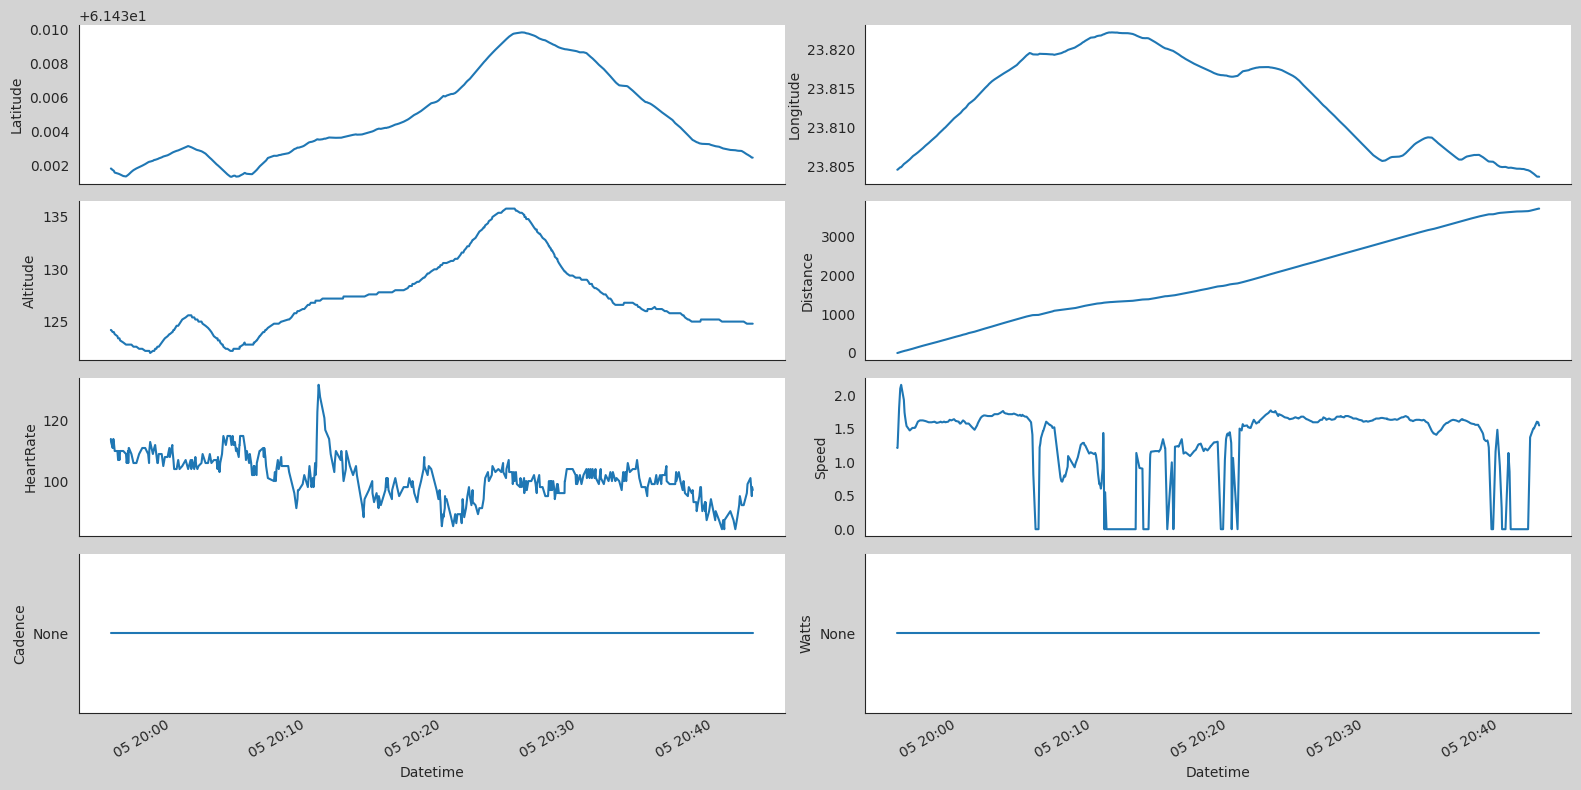

In [22]:
df_plot = df_ac1.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(16, 8))
fig.patch.set_facecolor('lightgray')

for i, ax in enumerate(fig.axes):
    sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
    ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        
fig.tight_layout()
plt.show()

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

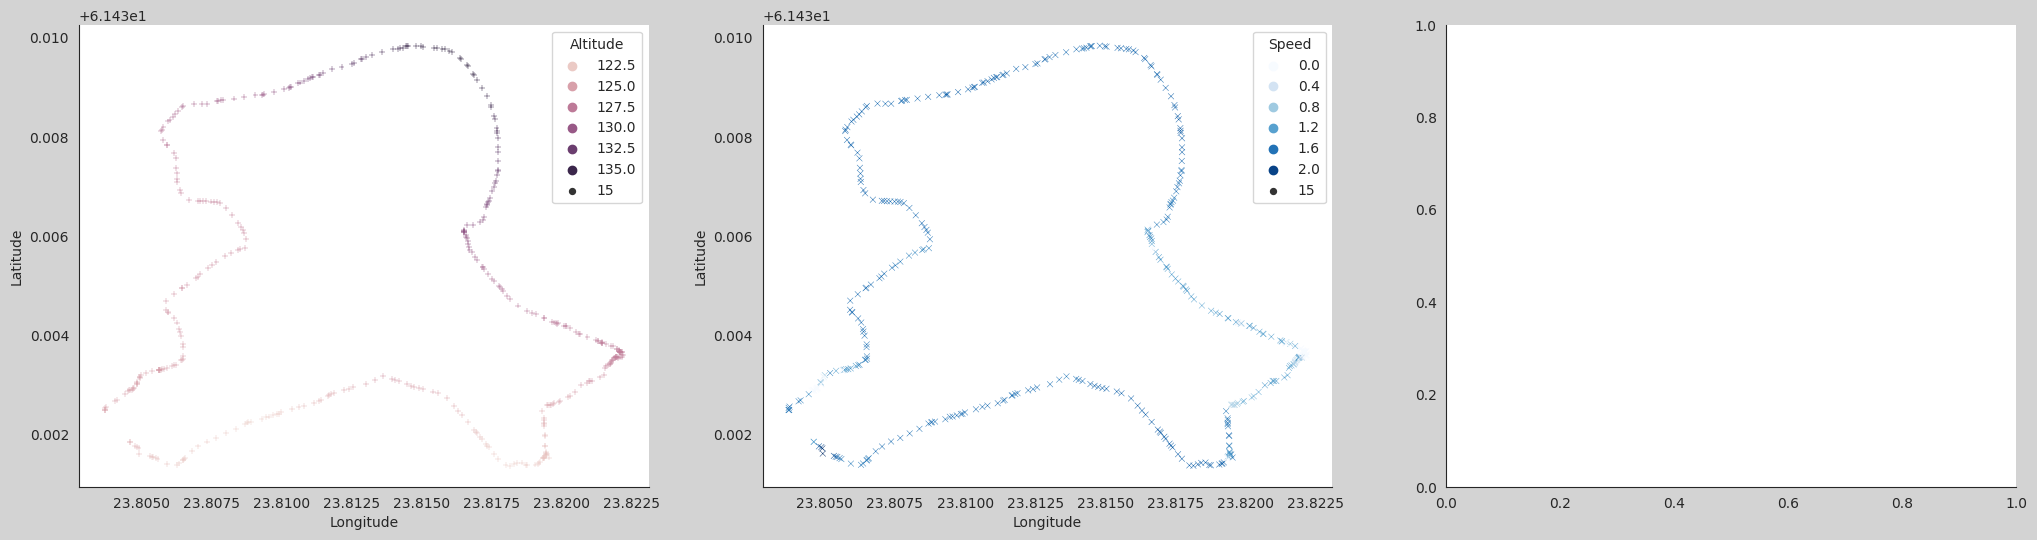

In [23]:
fig, ax = plt.subplots(1,3,figsize=(25, 6), facecolor='lightgray')
sns.scatterplot(data=df_ac1[['Altitude','Longitude','Latitude']].reset_index(),
             x='Longitude', y='Latitude', hue='Altitude', size=15, marker='+', ax=ax[0])
sns.scatterplot(data=df_ac1[['Speed','Longitude','Latitude']].reset_index(),
             x='Longitude', y='Latitude', hue='Speed', size=15, marker='x', palette='Blues', ax=ax[1])
#sns.scatterplot(data=df_ac1[['HeartRate','Longitude','Latitude']].reset_index(),
#             x='Longitude', y='Latitude', hue='HeartRate', size=15, marker='o', palette="rocket", ax=ax[2])

Text(0.5, 0, 'Speed')

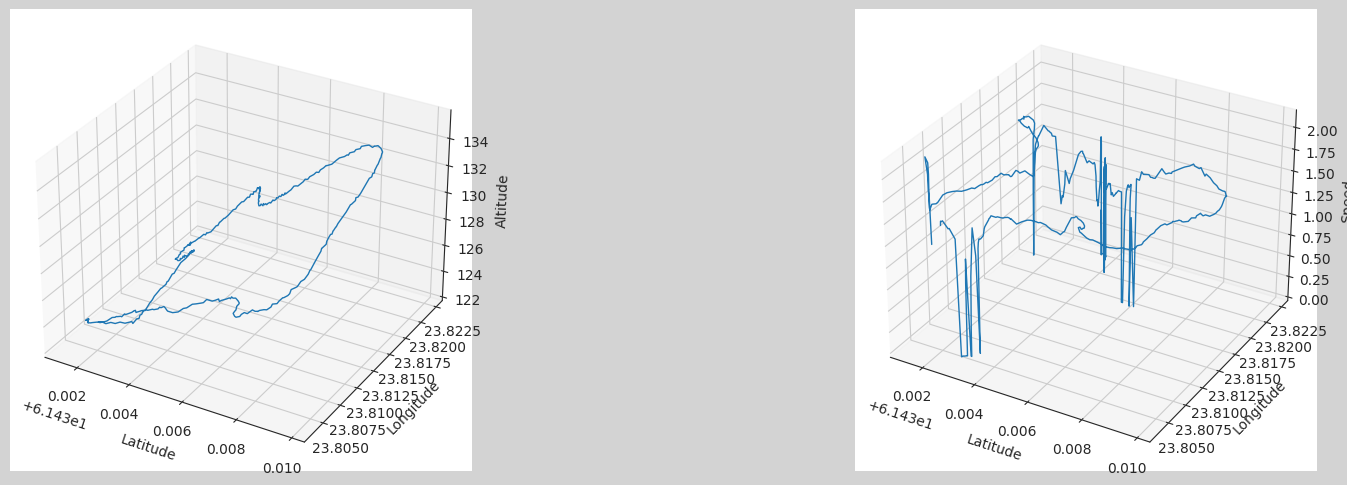

In [24]:
fig = plt.figure(figsize=(20,6), facecolor='lightgray')
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot3D(df_ac1['Latitude'], df_ac1['Longitude'], df_ac1['Altitude'], lw=1)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Longitude')
ax1.set_zlabel('Altitude')
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot3D(df_ac1['Latitude'], df_ac1['Longitude'], df_ac1['Speed'], lw=1)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Longitude')
ax2.set_zlabel('Speed')

**Sample B**

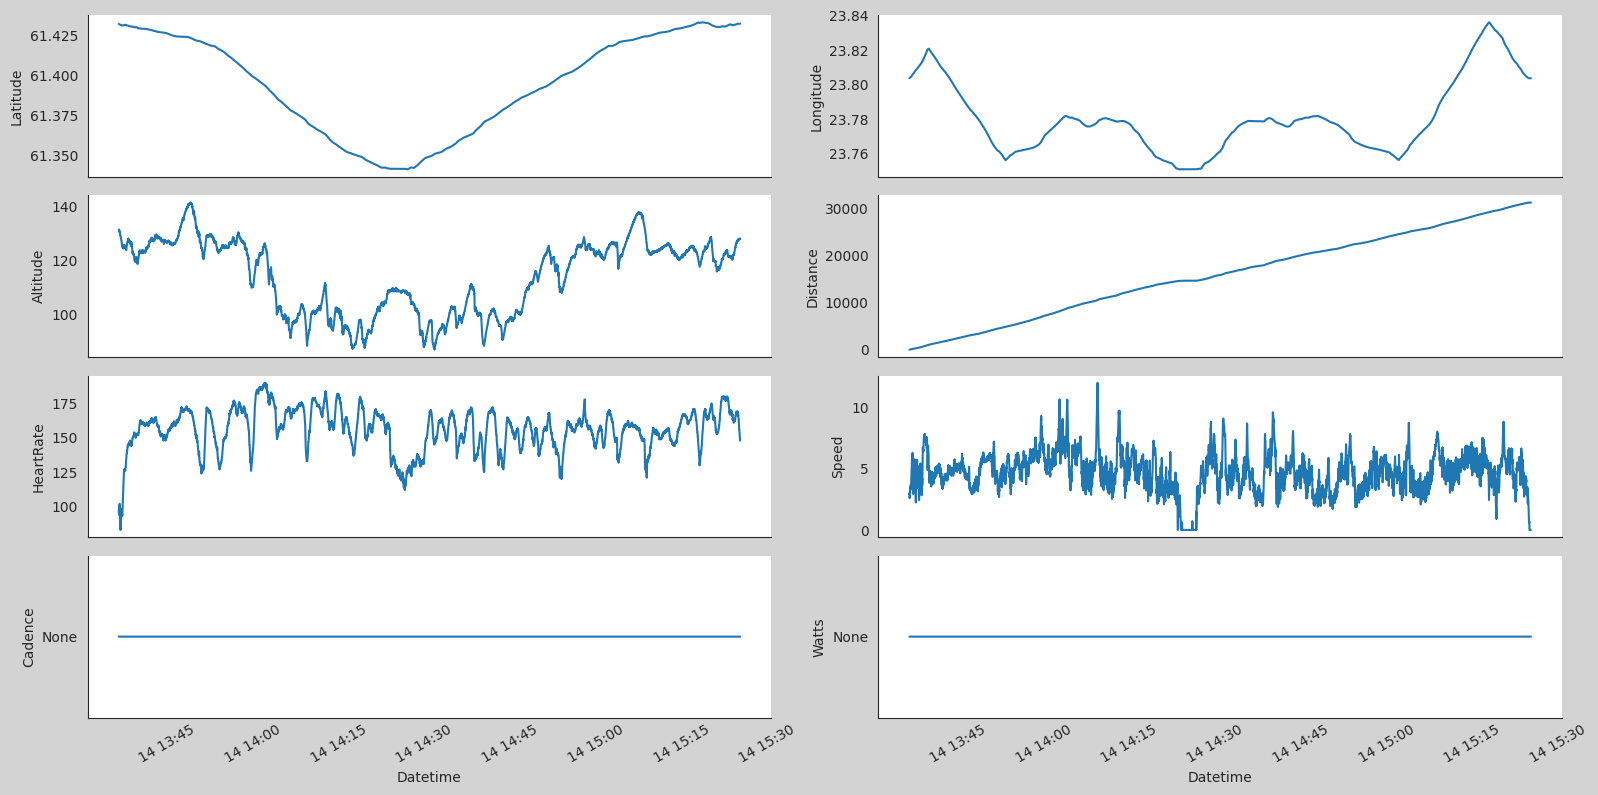

In [25]:
df_plot = df_ac2.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(16, 8))
fig.patch.set_facecolor('lightgray')

for i, ax in enumerate(fig.axes):
    sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
    ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        
fig.tight_layout()
plt.show()

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

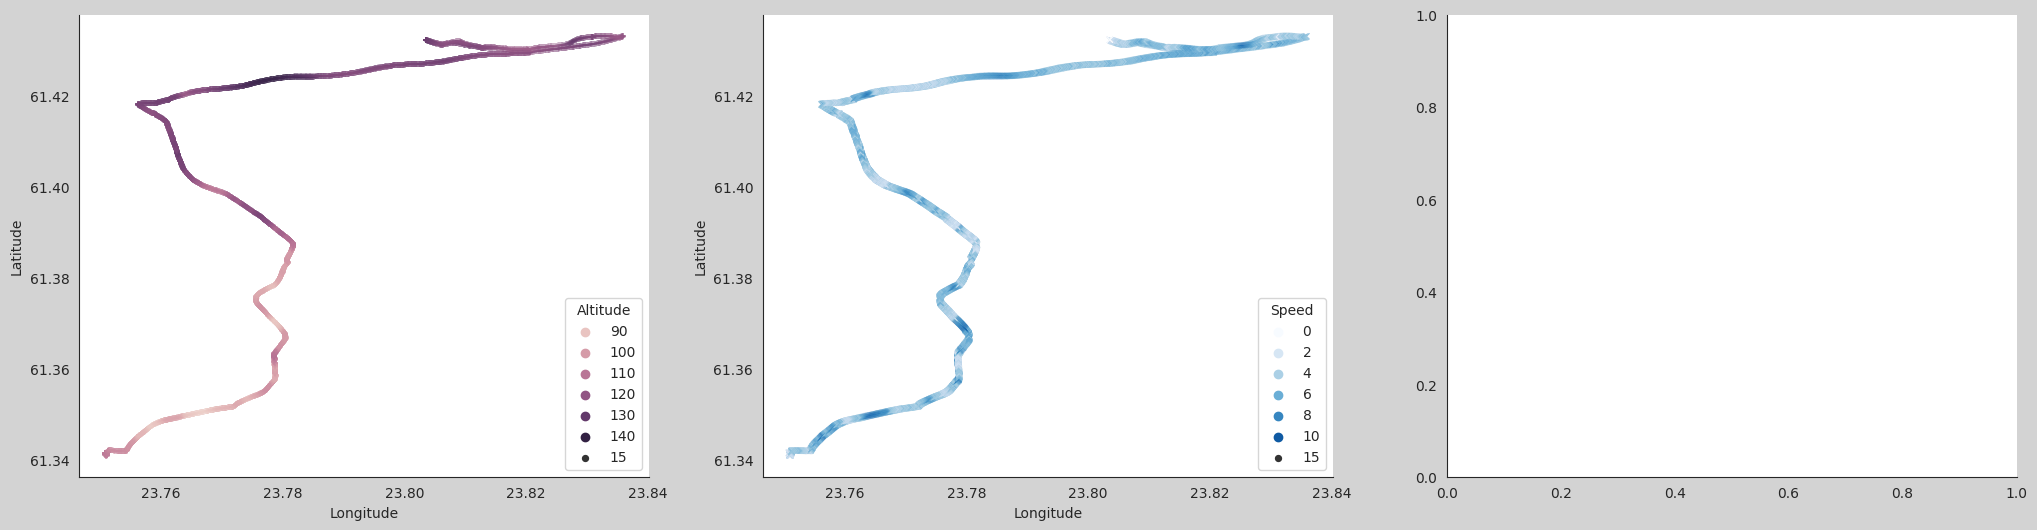

In [26]:
fig, ax = plt.subplots(1,3,figsize=(25, 6), facecolor='lightgray')
sns.scatterplot(data=df_ac2[['Altitude','Longitude','Latitude']].reset_index(),
             x='Longitude', y='Latitude', hue='Altitude', size=15, marker='+', ax=ax[0])
sns.scatterplot(data=df_ac2[['Speed','Longitude','Latitude']].reset_index(),
             x='Longitude', y='Latitude', hue='Speed', size=15, marker='x', palette='Blues', ax=ax[1])
#sns.scatterplot(data=df_ac2[['HeartRate','Longitude','Latitude']].reset_index(),
#             x='Longitude', y='Latitude', hue='HeartRate', size=15, marker='o', palette='rocket', ax=ax[2])

Text(0.5, 0, 'Speed')

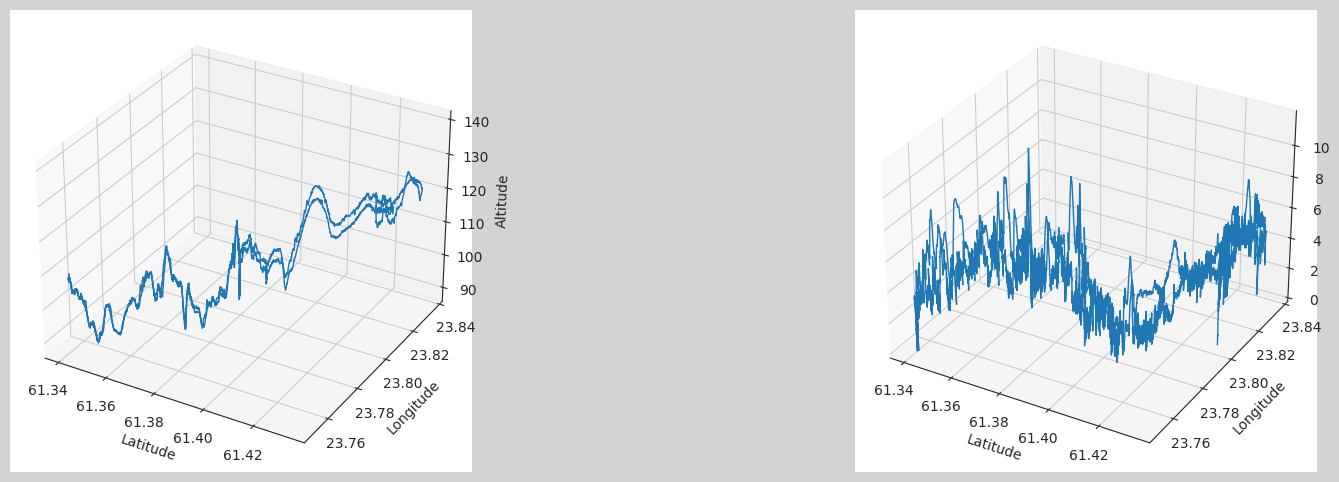

In [27]:
fig = plt.figure(figsize=(20,6), facecolor='lightgray')
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot3D(df_ac2['Latitude'], df_ac2['Longitude'], df_ac2['Altitude'], lw=1)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Longitude')
ax1.set_zlabel('Altitude')
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot3D(df_ac2['Latitude'], df_ac2['Longitude'], df_ac2['Speed'], lw=1)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Longitude')
ax2.set_zlabel('Speed')

---

<a id="2"></a> <br>
## [▲](#CT) 2 - Dataset construction for TSA

<a id="2A"></a> <br>
### [▲](#2) 2A - Data Preprocessing

**Function to get filenames and target/label data**

In [28]:
'''
Ordering MUST BE ENABLED - Otherwise data labels in the target file will be confused!
'''
def get_entries_with_labels(data_path, target_file_name, ordering=True, info=False):
    entries = os.listdir(data_path)
    # Lets remove target file from the list
    entries.pop(entries.index(target_file_name))
    # If ordering selected in function call
    if ordering:
        entries = np.sort(entries).tolist()

    # Getting targets ( and removes it from the entries => entries.pop() )
    targets = pd.read_csv(data_path + target_file_name, delimiter=';', header=0)
    if info:
        print("Found " + str(len(entries)) + " files from the directory '" + data_path + "'")
        print("Found " + str(len(targets)) + " labels for the data from the file '" + target_file_name + "'")

    return (entries, targets)

**Set entries and targets**

In [29]:
ENTRIES, TARGETS = get_entries_with_labels(DATA_PATH, TARGET_FILENAME, info=True)

Found 297 files from the directory '../data/CSVDATA/SET1/'
Found 297 labels for the data from the file 'activity_types.csv'


In [30]:
TARGETS.head(5)

activity_name
0        Biking
1         Other
2        Biking
3        Biking
4         Other

#### Data Sequencing
- *Dealing with missing values in the same loop*
- *Some instructions how to deal with missing values*

https://www.projectpro.io/recipes/deal-with-missing-values-in-timeseries-in-python


**Functions for sequences**

Validation of pandas interpolation missing value filling method 

In [31]:
df = pd.DataFrame([(np.nan, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (np.nan, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))

df.interpolate(method='linear', limit_direction='both', axis=0)

a    b    c     d
0 NaN  2.0 -1.0   1.0
1 NaN  2.0 -2.0   5.0
2 NaN  3.0 -3.0   9.0
3 NaN  4.0 -4.0  16.0

Function to create sequencies from the raw files

In [32]:
'''
This function reads CSV files from the given datapath. Files will be processed
using pandas dataframe. Then processed single files is combined into the same 
list of objects. This list of varying length sequences has the following value 
properties:

- All NaN values from the data is removed
- Gaps (missing values) are filled using linear forward/backward filling method

@data_path: Directory to read files from
@entries: Actual .csv format file names
@features: Features/column names to be used from the original files
'''
def get_sequences(data_path, entries, features, info=False):

    sequences = list()

    for entry in entries:
        # Read entry (csv file) to pandas dataframe for data processing
        df_data = pd.read_csv(data_path + entry, delimiter=';')
        
        # Set index to datatime object (one second intervals)
        df_data.index = pd.to_datetime(pd.Series(df_data.index))
        
        # Select features (given as parameter)
        df_data = df_data[features].copy()
        
        # Replace string type of 'None' to np.nan
        df_data.replace('None', np.nan, inplace=True)
        df_data = df_data.apply(pd.to_numeric, errors='ignore')
        
        # Fills nan values by context values (Some time series classifier models do not accept missing values)
        df_data.interpolate(method='linear', limit_direction='both', axis=0, inplace=True)
        # This fills gaps using last valid value (e.g., [2,3,6,nan,nan,8,7] => [2,3,6,6,6,8,7])
        #df_data.fillna(method='ffill', inplace=True) 
        
        # NOTE: Filling methods used above do not work if all values are 'nan'
        # Therefore, we replace rest of np.nan values using different method 
        df_data.fillna(0, inplace=True)
        
        # Take values and add them to the sequence list
        sequences.append(df_data.values.astype(float))

    if info:
        print("Created " + str(len(sequences)) + " sequences from " + str(len(entries)) + " entries")

    return np.asarray(sequences, dtype=object)

Function to analyze set of sequences

In [33]:
def sequence_analysis(sequences):
    len_sequences = []
    for one_seq in sequences:
        len_sequences.append(len(one_seq))

    return pd.Series(len_sequences).describe()

**Create sequences with given features**

In [34]:
# List of considered Features
FEATURES = ['HeartRate', 'Speed', 'Altitude']
SEQUENCES = get_sequences(DATA_PATH, ENTRIES, FEATURES, info=True)

Created 297 sequences from 297 entries


**About SEQUENCES**

Since the time series data is of varying length, we cannot directly build a model on this dataset. So how can we decide the ideal length of a series? There are multiple ways in which we can deal with it and here are a few ideas (I would love to hear your suggestions in the comment section):

- Pad the shorter sequences with zeros to make the length of all the series equal. In this case, we will be feeding incorrect data to the model
- Find the maximum length of the series and pad the sequence with the data in the last row
- Identify the minimum length of the series in the dataset and truncate all the other series to that length. However, this will result in a huge loss of data
- Take the mean of all the lengths, truncate the longer series, and pad the series which are shorter than the mean length

Let’s find out the minimum, maximum and mean length:

In [35]:
sequence_analysis(SEQUENCES)

count      297.000000
mean      3952.636364
std       3122.473442
min          0.000000
25%       1223.000000
50%       3817.000000
75%       5643.000000
max      19781.000000
dtype: float64

#### Data Filtering

Here the following global variables are set

`REJECT_INDEX`, `TARGET_FILTERED_IDX`, `SEQ_FILTERED`, `INDEX_DATA`

**Function for data sequence filtering**

In [36]:
'''
Function filters data based on the limits given as a parameters.
For minimum sequence length limit (len_lim) shorter sequences will be rejected
For columns, limits are supposed to be mean values.

NOTE: This function seeks only for indexes, and it does not modify any global
variables
'''
def filter_values(sequences, len_lim=500, hr_lim=0, spd_lim=0, alt_lim=0):
    rm_index = []

    for i, s in zip(range(0,len(sequences)), sequences):
        hr_values = np.asarray(s[:,0], dtype=int)
        spd_values = np.asarray(s[:,1], dtype=float)
        alt_values = np.asarray(s[:,2], dtype=float)

        if len(s) < len_lim:
            rm_index.append(i)
        else:
            # For debug, print mean values
            #print(hr_values.mean(), spd_values.mean(), alt_values.mean())
            if hr_values.mean() <= hr_lim:
                rm_index.append(i)
            elif spd_values.mean() <= spd_lim:
                rm_index.append(i)
            elif alt_values.mean() <= alt_lim:
                rm_index.append(i)

    print(len(rm_index), rm_index)

    return rm_index


**Create filtered sequence list**

Get indexes for sequences which do not meet the requirements

In [37]:
SEQUENCES.shape

(297,)

In [38]:
REJECT_INDEX = filter_values(SEQUENCES, len_lim=500, hr_lim=100, spd_lim=1, alt_lim=1)

65 [2, 3, 5, 6, 7, 9, 13, 18, 19, 28, 29, 34, 37, 43, 45, 46, 58, 60, 61, 65, 67, 73, 89, 91, 93, 98, 105, 108, 109, 118, 119, 120, 122, 124, 131, 133, 134, 136, 138, 139, 146, 150, 159, 161, 179, 207, 208, 212, 218, 221, 226, 227, 228, 231, 232, 234, 236, 239, 248, 249, 250, 252, 272, 288, 290]


Let's store labels and original indexes to the data frame

In [39]:
TARGET_FILTERED_IDX = [index for index in TARGETS.index if index not in REJECT_INDEX]
print('len() =', len(TARGET_FILTERED_IDX), TARGET_FILTERED_IDX)

len() = 232 [0, 1, 4, 8, 10, 11, 12, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 62, 63, 64, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 121, 123, 125, 126, 127, 128, 129, 130, 132, 135, 137, 140, 141, 142, 143, 144, 145, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 209, 210, 211, 213, 214, 215, 216, 217, 219, 220, 222, 223, 224, 225, 229, 230, 233, 235, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247, 251, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 

Check labels

In [40]:
TARGETS['activity_name'][TARGET_FILTERED_IDX].values

array(['Biking', 'Other', 'Other', 'Biking', 'Other', 'Biking', 'Running',
       'Other', 'Biking', 'Biking', 'Running', 'Biking', 'Other',
       'Biking', 'Biking', 'Biking', 'Other', 'Running', 'Other', 'Other',
       'Biking', 'Running', 'Biking', 'Biking', 'Biking', 'Running',
       'Biking', 'Biking', 'Other', 'Biking', 'Running', 'Biking',
       'Other', 'Running', 'Running', 'Other', 'Biking', 'Biking',
       'Other', 'Other', 'Biking', 'Other', 'Running', 'Biking', 'Other',
       'Running', 'Other', 'Other', 'Running', 'Other', 'Biking',
       'Running', 'Running', 'Other', 'Biking', 'Running', 'Biking',
       'Other', 'Other', 'Biking', 'Other', 'Other', 'Biking', 'Biking',
       'Other', 'Biking', 'Other', 'Biking', 'Other', 'Running', 'Biking',
       'Running', 'Running', 'Other', 'Biking', 'Running', 'Running',
       'Other', 'Running', 'Biking', 'Running', 'Other', 'Running',
       'Running', 'Running', 'Other', 'Running', 'Running', 'Running',
       'Running

Save labels of filtered sequences with their original indexes to the dataframe

In [41]:
INDEX_DATA = pd.DataFrame(columns=['org_index','label'])
INDEX_DATA['org_index'] = np.array(TARGET_FILTERED_IDX)
INDEX_DATA['label'] = TARGETS['activity_name'][TARGET_FILTERED_IDX].values

In [42]:
INDEX_DATA.sample(6).sort_index()

org_index    label
20          31   Biking
59          81   Biking
109        151  Running
157        202    Other
183        241    Other
230        295  Running

In [43]:
SEQ_FILTERED = np.array(SEQUENCES, dtype=object)[TARGET_FILTERED_IDX]

Final NaN value debug

In [44]:
# Counting 'nan' values
for i, s in enumerate(SEQ_FILTERED):
    if np.count_nonzero(np.isnan(s)) > 0:
        print("index:", i, "has 'nan' values of", np.count_nonzero(np.isnan(s)))

In [45]:
# Here you may check all values from the index having 'nan' values
SEQ_FILTERED[42][:,2]

array([166.3999939 , 166.3999939 , 166.3999939 , ..., 172.        ,
       172.80000305, 173.3999939 ])

Let's ensure that target and sequence lengths corresbonds

In [46]:
len(SEQ_FILTERED), len(TARGET_FILTERED_IDX)

(232, 232)

In [47]:
print("(" + str(SEQ_FILTERED.shape[0]) + ", ?, " + str(SEQ_FILTERED[0].shape[1]) +")" )

(232, ?, 3)


In [48]:
sequence_analysis(SEQ_FILTERED)

count      232.000000
mean      4624.396552
std       2797.697160
min        524.000000
25%       2906.750000
50%       4452.500000
75%       5978.000000
max      19781.000000
dtype: float64

#### Data Segmentation (split)

NOTE: This is not applied
*(There exist also segmentation functions in sktime library) check https://www.sktime.org/en/stable/api_reference/transformations.html*

**Functions for segmentation (Data Augmentation)**

In [49]:
def get_segments(sequence, label, seg_len=100, conditions=[]):
    segments = []
    labels = []
    
    seq_len = sequence.shape[0]
    
    if seq_len < seg_len:
        return segments 
    
    for i in range(0, seq_len, seg_len):
        if i + seg_len < seq_len:
            #np.stack((segments, sequence[i:i+100,:]))
            segments.append(sequence[i:i+seg_len,:])
        else:
            #np.stack((segments, sequence[-100:,:]))
            segments.append(sequence[-seg_len:,:])
            
        labels.append(label)
            
    return segments, labels

In [50]:
def segment_data(sequences, targets, seg_len, info=True):
    segmented_labels = []
    segmented_seqs = []

    for i, seq in zip(range(0, len(targets)), sequences):
        splits, seg_labels = get_segments(sequences[0], targets['label'][i], seg_len)
        segmented_seqs.extend(splits)
        segmented_labels.extend(seg_labels)

    segmented_seqs = np.array(segmented_seqs)
    segmented_labels = np.array(segmented_labels)

    if info:
        print("Sequence data to be segmented: (" + str(sequences.shape[0]) + ", ?, " 
                                                 + str(sequences[0].shape[1]) +")" )
        print("Segmented sequences: ", segmented_seqs.shape)

    return segmented_seqs, segmented_labels

**Sequence segmentation (creating sub intervals)**

In [51]:
# Minimum length of sequence will be used as a segment/interval length
SEG_LEN = int(sequence_analysis(SEQ_FILTERED)['min'])
SEQ_SEGMENTED, SEQ_SEGMENTED_LABELS = segment_data(SEQ_FILTERED, INDEX_DATA, SEG_LEN, info=True)

Sequence data to be segmented: (232, ?, 3)
Segmented sequences:  (1160, 524, 3)


#### Sequence data variables
1. **SEQUENCES <=> TARGETS** (297,3)        *Series length vary from [0, ~20000]*
2. **SEQ_FILTERED <=> INDEX_DATA** (241,3)    *Subset of sequences using minimum length criteria*
3. **SEQ_SEGMENTED <=> SEQ_SEGMENTED_LABELS**  *Subset of sequencies are used fully, splitting data into equal length segments*

---

<a id="2B"></a> <br>
### [▲](#2) 2B - Train-Test data splitting *(stratified by y)*

- Dataset generation from the sequencies
- Train and Test splits
- Functions for data variable initialization
- Global variable `SEQ_LEN` will be initialized

**Libraries**

In [52]:
# Data manipulation
from sktime.utils.slope_and_trend import _slope
from sktime.datatypes._panel._convert import from_2d_array_to_nested
from sktime.transformations.panel.reduce import Tabularizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Data setup functions**

Function to create dataset

In [53]:
def create_dataset(sequences, targets, seq_start=0, seq_end=100, std=False, info=True):

    if info: print("\nSequence/Targets length validity check: ", len(sequences), len(targets))

    target = targets.label.astype('category').cat.codes

    seq_len = seq_end - seq_start

    x_data = np.zeros((len(sequences), seq_len))
    y_data = np.zeros(len(sequences))

    if info: print(x_data.shape, y_data.shape)

    for i, s in zip(range(0,len(sequences)), sequences):
        if info: print(i,s.shape)
        # Sequence manipulation
        signal = s.reshape(-1,1)
        signal = np.squeeze(np.asarray(signal))
        signal = signal[seq_start:seq_end]
        #if info: print(signal.shape)
        x_data[i] = signal
        y_data[i] = target[i]

    if std:
        if info: print("Standardization")
        x_data = StandardScaler().fit_transform(x_data)

    print('X:', x_data.shape, ' y:', y_data.shape)

    return x_data, y_data

Nested data variable reset function

In [54]:
# Run this if data variable reset needed
def initdata_xynested(seq_start, seq_end):
    global x_data, y_data
    global x_train, x_test, y_train, y_test
    global X_train_nest, X_test_nest
    # The whole data
    x_data, y_data = create_dataset(SEQ_FILTERED, INDEX_DATA, seq_start=seq_start, seq_end=seq_end, std=False, info=False)
    # Train-Test data splits
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=24, stratify=y_data, shuffle=True)
    print('Train:', x_train.shape, y_train.shape, 'Test:', x_test.shape, y_test.shape)
    # Multivariate
    X_train_nest = from_2d_array_to_nested(x_train)
    X_test_nest  = from_2d_array_to_nested(x_test)

Nested data variable reset function (Standard)

In [55]:
# Run this if standard data variable reset needed
def initdata_xynested_std(seq_start, seq_end):
    global x_data_std, y_data
    global x_train_std, x_test_std, y_train, y_test
    global X_train_nest_std, X_test_nest_std
    # The whole data (standard)
    x_data_std, y_data = create_dataset(SEQ_FILTERED, INDEX_DATA, seq_start=seq_start, seq_end=seq_end, std=True, info=False)
    # Train-Test data splits (standard)
    x_train_std, x_test_std, y_train, y_test = train_test_split(x_data_std, y_data, test_size=0.2, random_state=24, stratify=y_data, shuffle=True)
    print('Train:', x_train_std.shape, y_train.shape, 'Test:', x_test_std.shape, y_test.shape)
    # Multivariate
    X_train_nest_std = from_2d_array_to_nested(x_train_std)
    X_test_nest_std  = from_2d_array_to_nested(x_test_std)

Tabular data reset function

- This function uses global variables `X_train_nest_std`, `X_test_nest_std` and tabularizes them. Therefore recommended to use only together with nested data variable reset functions
- New global variables `X_train_tab`, `X_test_tab`, `X_train_tab_std` and `X_test_tab_std` will be initialized

In [56]:
def initdata_xytabular(std=False):
    global X_train_tab, X_test_tab
    tabu = Tabularizer()
    X_train_tab = tabu.fit_transform(X_train_nest)
    X_test_tab = tabu.fit_transform(X_test_nest)

    if std:
        global X_train_tab_std, X_test_tab_std
        tabu = Tabularizer()
        X_train_tab_std = tabu.fit_transform(X_train_nest_std)
        X_test_tab_std = tabu.fit_transform(X_test_nest_std)

Data reset function

`init_data(seq_start, seq_end, nest=True, tab=False, std=False)`

In [57]:
def init_data(seq_start, seq_end, nest=True, tab=False, std=False):
    # Initilaizes nested data variables for sktime classification models
    if nest:
        initdata_xynested(seq_start, seq_end)
        # Standard
        if std:
            initdata_xynested_std(seq_start, seq_end)

    # Initializes tabular data for sklearn classifiers
    if tab:
        initdata_xytabular()
        # Standard
        if std:
            initdata_xytabular(std=True)

**Initialize data**
- Initializes global data variables according to the given parameters
- Creates the data splits (and feedback prints according to the *create_dataset()* function)


In [58]:
SEQ_LEN = int(sequence_analysis(SEQ_FILTERED)['min'])
init_data(0, SEQ_LEN, nest=True, tab=True, std=True)

X: (232, 524)  y: (232,)
Train: (185, 524) (185,) Test: (47, 524) (47,)
X: (232, 524)  y: (232,)
Train: (185, 524) (185,) Test: (47, 524) (47,)


Random time series plots (for analysis)

Activity type = 0


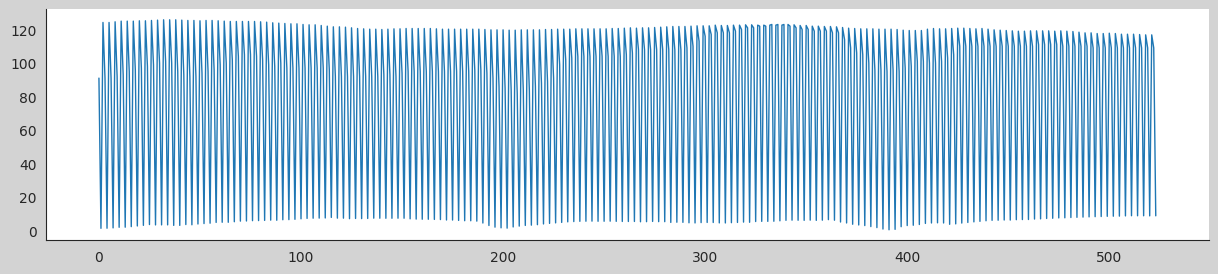

Activity type = 0


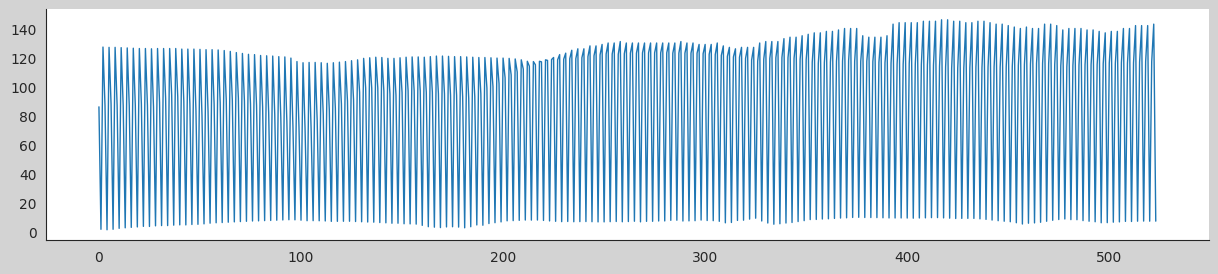

In [59]:
plt.figure(figsize=(15,3), facecolor='lightgray')
plt.plot(x_train[16], lw=1)
print("Activity type = %d" % y_train[16])
plt.show()

plt.figure(figsize=(15,3), facecolor='lightgray')
plt.plot(x_test[2], lw=1)
print("Activity type = %d" % y_test[2])
plt.show()

<a id="2C"></a> <br>
### [▲](#2) 2C - Data Standardization *(for visualization)*

- Data can be standardized using **create_dataset(** *std=True* **)** function parameter
- This section procedure has precondition that **x_train** and **x_test** data is in two dimensional space

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Activity type = 0


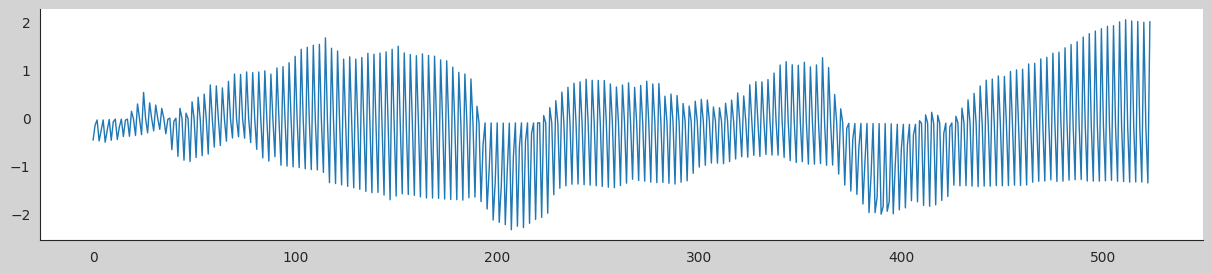

Activity type = 0


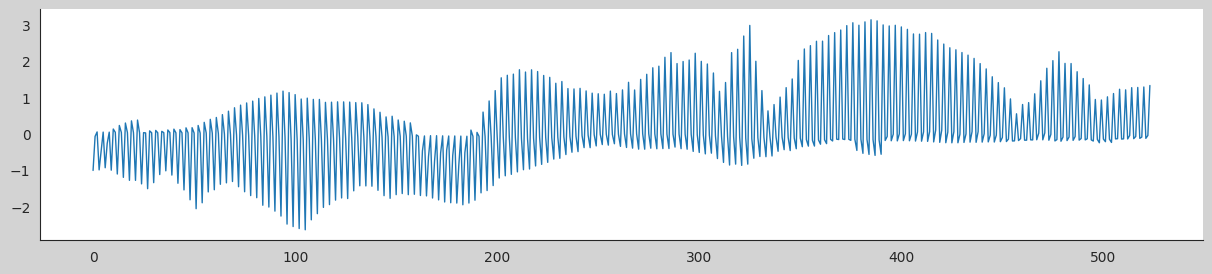

In [61]:
plt.figure(figsize=(15,3), facecolor='lightgray')
plt.plot(x_train[16], lw=1)
print("Activity type = %d" % y_train[16])
plt.show()

plt.figure(figsize=(15,3), facecolor='lightgray')
plt.plot(x_test[2], lw=1)
print("Activity type = %d" % y_test[2])
plt.show()

In [62]:
label1 = x_train[np.where(y_train==0)]
label2 = x_train[np.where(y_train==1)]
label3 = x_train[np.where(y_train==2)]

print(len(label1), len(label2), len(label3))

39 87 59


In [63]:
# Or
pd.DataFrame(y_train.astype(int)).value_counts()

1    87
2    59
0    39
dtype: int64

**Random activities (for each category)**

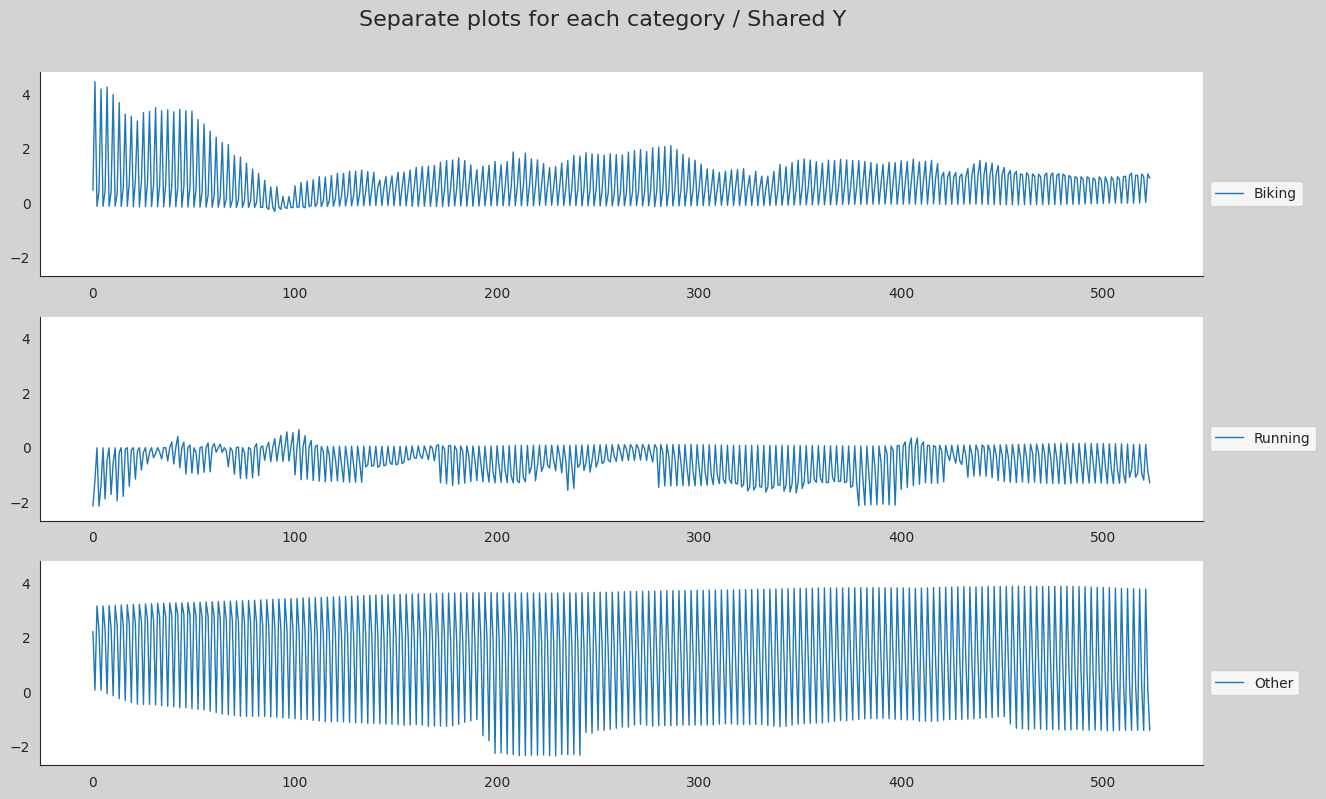

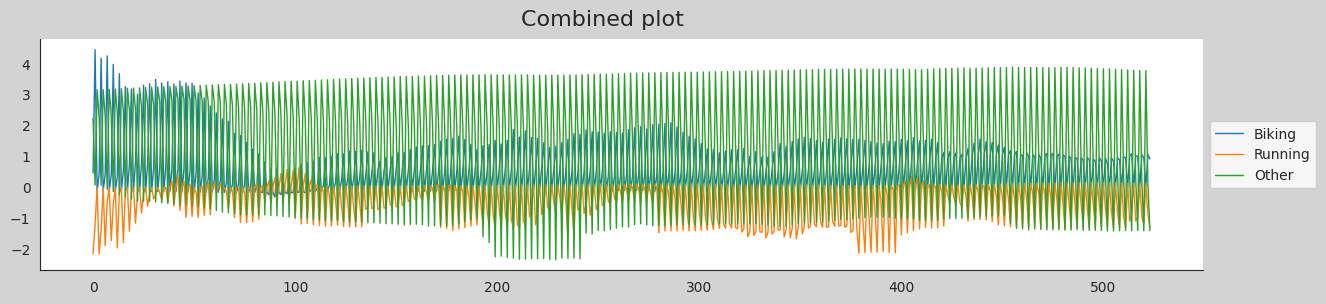

In [64]:
#@title { run: "auto" }
rand_index = 5 #@param {type:"slider", min:0, max:42, step:1}

fig, ax = plt.subplots(3,1, figsize=(15,9), facecolor='lightgray', sharey=True)
fig.suptitle('Separate plots for each category / Shared Y', y=0.95, fontsize=16)
ax[0].plot(label1[rand_index], lw=1, label='Biking')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 0.5))
ax[1].plot(label2[rand_index], lw=1, label='Running')
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 0.5))
ax[2].plot(label3[rand_index], lw=1, label='Other')
ax[2].legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

fig = plt.figure(figsize=(15,3), facecolor='lightgray')
fig.suptitle('Combined plot', fontsize=16)
plt.plot(label1[rand_index], lw=1, label='Biking')
plt.plot(label2[rand_index], lw=1, label='Running')
plt.plot(label3[rand_index], lw=1, label='Other')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Random activities (for same category)**

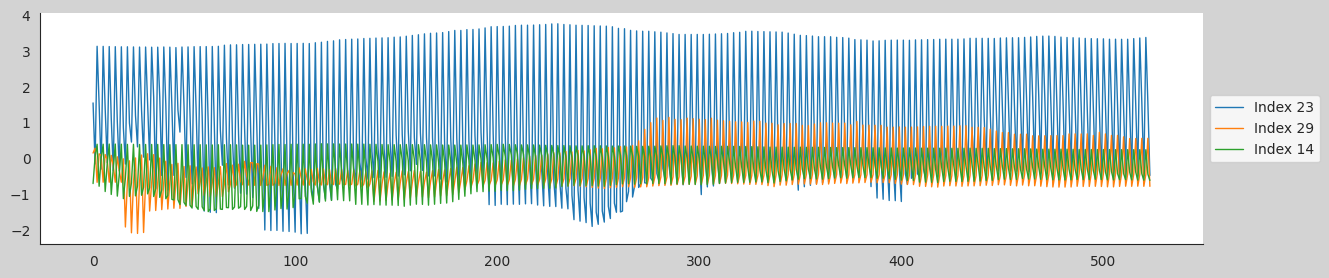

In [65]:
#@title { run: "auto" }
rand_index1 = 23 #@param {type:"slider", min:0, max:42, step:1}
rand_index2 = 29 #@param {type:"slider", min:0, max:42, step:1}
rand_index3 = 14 #@param {type:"slider", min:0, max:42, step:1}
label = label3 #@param ["label1", "label2", "label3"] {type: "raw"}


plt.figure(figsize=(15,3), facecolor='lightgray')
plt.plot(label[rand_index1], lw=1, label='Index ' + str(rand_index1))
plt.plot(label[rand_index2], lw=1, label='Index ' + str(rand_index2))
plt.plot(label[rand_index3], lw=1, label='Index ' + str(rand_index3))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

---

<a id="3"></a> <br>
## [▲](#CT) 3 - Multivariate Time Series Classification (TSA)

**Sktime**
- [X] Time Series Forest Classifier
- [X] Supervised Time Series Forest
- [X] Random Interval Spectral Ensemble (RISE)
- [X] Random Interval Classifier
- [X] Shapelet Transform Classifier
- [X] KNeighbors Time Series Classifier
- [X] Composable Time Series Forest Classifier
- [O] Optional: Canonical Interval Forest


**Sklearn**
- [X] Random Forest Classifier
- [X] Decision Tree Classifier
- [X] Ridge Classifier CV
- [X] Support Vector Classifier
- [X] KNeighborsClassifier
- [X] Gradient Boosting Classifier
- [X] Stochastic Gradient Descent Classifier

---

<a id="3A"></a> <br>
### [▲](#3) 3A - Libraries and functions

Some dependencies must be installed

In [66]:
%pip install tsfresh
%pip install esig
%pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 2.4 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.6/331.6 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.2/918.2 kB 16.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 2.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 11.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 kB 3.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.4/497.4 kB 13.7 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 kB 8.6 MB/s

In [67]:
# SKLearn classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

# SKTime classifiers
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.interval_based import SupervisedTimeSeriesForest
from sktime.classification.interval_based import CanonicalIntervalForest
from sktime.classification.interval_based import RandomIntervalSpectralEnsemble # RISE
from sktime.classification.feature_based import RandomIntervalClassifier
from sktime.classification.compose import ComposableTimeSeriesForestClassifier
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
#from sktime.classification.kernel_based import RocketClassifier # Import problem

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# Metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sktime.datasets import load_unit_test
# Time and Progress bar solution (tqdm)
from time import time
from tqdm import tqdm

In [68]:
def plot_confmatrix(yval, ypred):
    plt.figure()
    cm = pd.DataFrame(confusion_matrix(yval, ypred))
    cm_norm = cm.apply(lambda x: x/x.sum(), axis = 1)
    sns.set(font_scale=1.1) # for label size
    sns.heatmap(cm_norm, annot=True, yticklabels=('Pred A1', 'Pred A2','Pred A3'), 
                                     xticklabels=('Actual A1', 'Actual A2','Actual A3'),
                                     fmt='.1%',
                                     cmap='Blues',
                                     annot_kws={"size": 12}) # font size
    plt.show()

<a id="3B"></a> <br>
### [▲](#3) 3B - Data setup

Here we initialize global variables 
`x_data_std, y_data, x_train_std, x_test_std, y_train, y_test` using function `init_data(...)`

In [69]:
init_data(100, SEQ_LEN, nest=True, tab=True, std=True)

X: (232, 424)  y: (232,)
Train: (185, 424) (185,) Test: (47, 424) (47,)
X: (232, 424)  y: (232,)
Train: (185, 424) (185,) Test: (47, 424) (47,)


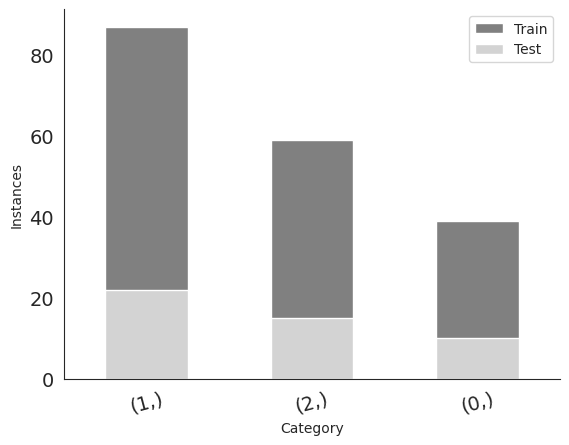

In [70]:
pd.DataFrame(y_train.astype(int)).value_counts().plot.bar(xlabel='Category', ylabel='Instances', rot=15, fontsize=14, label='Train', facecolor='gray')
pd.DataFrame(y_test.astype(int)).value_counts().plot.bar(xlabel='Category', ylabel='Instances', rot=15, color='red', label='Test', facecolor='lightgray')
plt.legend()

#### Signal visualization in test data

In [71]:
labels, counts = np.unique(y_test, return_counts=True)
print(labels, counts)

[0. 1. 2.] [10 22 15]


In [72]:
X_test_nest_std.head()

0
0  0      0.451339
1     -0.210961
2     -1.42801...
1  0      0.499642
1     -0.258054
2      0.46311...
2  0      1.485550
1     -0.180992
2     -2.39913...
3  0     -0.208521
1      0.465473
2      1.17867...
4  0     -0.800238
1     -0.639084
2      0.20755...

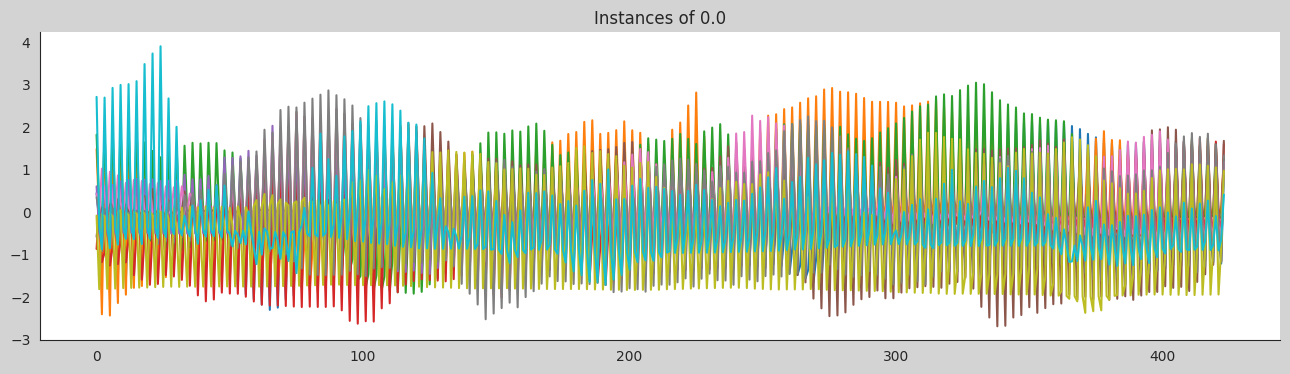

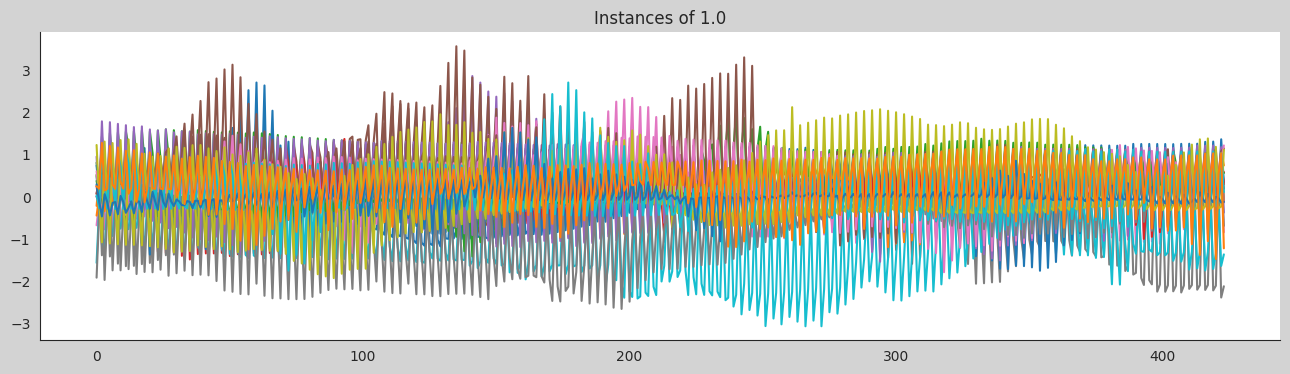

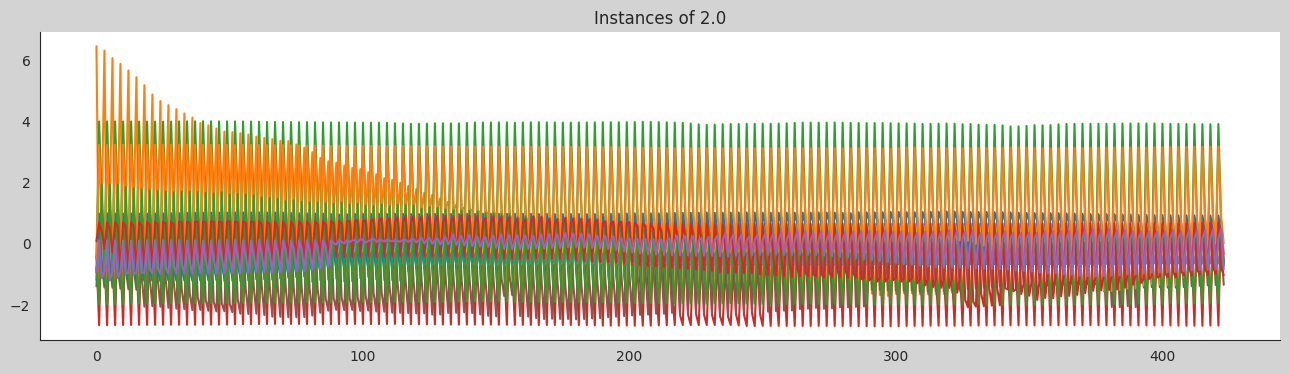

In [73]:
for label in labels:
    fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25), facecolor='lightgray')
    for instance in X_test_nest_std.loc[y_test==label, 0]:
        ax.plot(instance, label='label')
    ax.set(title=f"Instances of {label}")

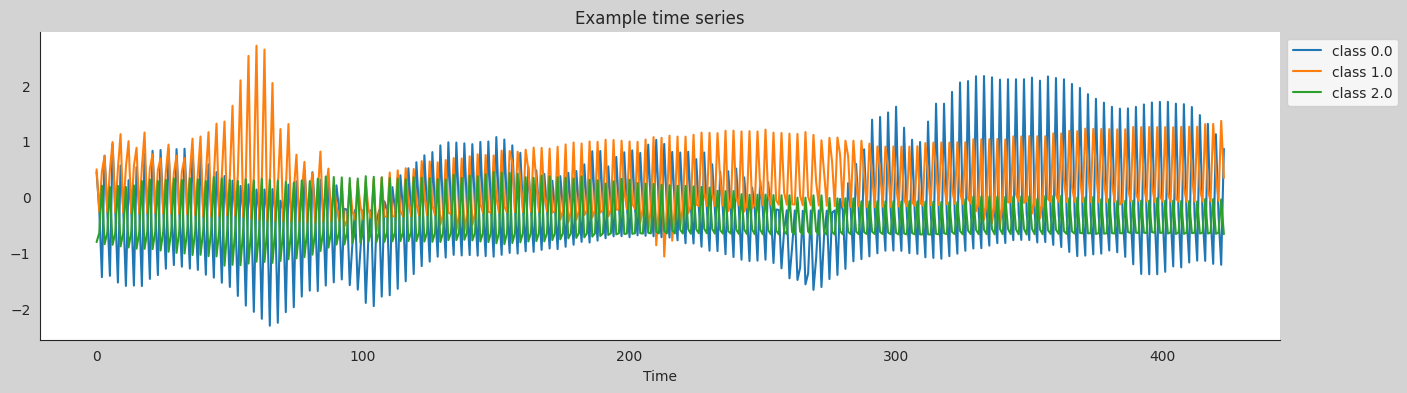

In [74]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25), facecolor='lightgray')
for label in labels:
    X_test_nest_std.loc[y_test==label, 0].iloc[0].plot(ax=ax, label=f"class {label}")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.set(title="Example time series", xlabel="Time");

<a id="3C"></a> <br>
### [▲](#3) 3C - SKTime classifiers 

**Time Series Forest (TSF)** classifier adapts the *Random Forest* classifier to series data.

1. Split the series into random intervals, with random start positions and random lengths.
2. Extract summary features (mean, standard deviation, and slope) from each interval into a single feature vector.
3. Train a decision tree on the extracted features.
4. Repeat steps 1–3 until the required number of trees have been built or time runs out.

**Supervised Time Series Forest** is an ensemble of decision trees built on intervals selected through a supervised process. 

Overview: Input *n* series length *m* For each tree
- Sample X using class-balanced bagging
- Sample intervals for all 3 representations and 7 features using supervised method
- Find mean, median, std, slope, iqr, min and max using their corresponding interval for each rperesentation, concatenate to form new data set
- Build decision tree on new data set

Ensemble the trees with averaged probability estimates.

Time series classification (TSC) aims to predict the class label of a given time series. Modern applications such as appliance modelling require to model an abundance of long time series, which makes it difficult to use many state-of-the-art TSC techniques due to their high computational cost and lack of interpretable outputs. To address these challenges, we propose a novel TSC method: the Supervised Time Series Forest (STSF). STSF improves the classification efficiency by examining only a (set of) sub-series of the original time series, and its tree-based structure allows for interpretable outcomes. STSF adapts a top-down approach to search for relevant sub-series in three different time series representations prior to training any tree classifier, where the relevance of a sub-series is measured by feature ranking metrics (i.e., supervision signals). Experiments on extensive real datasets show that STSF achieves comparable accuracy to state-of-the-art TSC methods while being significantly more efficient, enabling TSC for long time series.

N. Cabello, E. Naghizade, J. Qi and L. Kulik, "Fast and Accurate Time Series Classification Through Supervised Interval Search," 2020 IEEE International Conference on Data Mining (ICDM), 2020, pp. 948-953, doi: 10.1109/ICDM50108.2020.00107.

**Random Interval Spectral Ensemble**, or **RISE**, is a popular variant of *Time Series Forest*.

RISE differs from Time Series Forest in two ways. First, it uses a single time series interval per tree. Second, it is trained using spectral features extracted from the series, instead of summary statistics.

RISE use several series-to-series feature extraction transformers, including:

- Fitted auto-regressive coefficients
- Estimated autocorrelation coefficients
- Power spectrum coefficients (the coefficients of the Fourier transform)

The RISE algorithm is straightforward:

1. Select random interval of a series (length is a power of 2). (For the first tree, use the whole series)
2. For the same interval on each series, apply the series-to-series feature extraction transformers (autoregressive coefficients, autocorrelation coefficients, and power spectrum coefficients)
3. Form a new training set by concatenating the extracted features
4. Train a decision tree classifier
5. Ensemble 1–4

Class probabilities are calculated as a proportion of base classifier votes. RISE controls the run time by creating an adaptive model of the time to build a single tree. This is important for long series (such as audio), where very large intervals can mean very few trees.


**Shapelet-Based Classifiers**

Shapelets are subsequences, or small sub-shapes of time series that are representative of a class. They can be used to detect “phase-independent localised similarity between series within the same class” [1].

<img src="https://raw.githubusercontent.com/JABE22/Image/main/Random/shapelet_classifier.png" />

The blue line is the original time series. The red line is the shapelet extracted from it. Image modified from [4].
A single shapelet is an interval in a time series. The intervals in any series can be enumerated. For example, [1,2,3,4] has 5 intervals: [1,2], [2,3], [3,4], [1,2,3], [2,3,4].

Shapelet-based classifiers search for shapelets with discriminatory power.

These shapelet features can then be used to interpret a shapelet-based classifier — the presence of certain shapelets make one class more likely than another.

In [75]:
sktime_clfs = {
    'TimeSeriesForestClassifier': TimeSeriesForestClassifier(),
    'SupervisedTimeSeriesForest': SupervisedTimeSeriesForest(),
    'RandomIntervalSpectralEnsemble': RandomIntervalSpectralEnsemble(),
    'RandomIntervalClassifier': RandomIntervalClassifier(),
    'ShapeletTransformClassifier': ShapeletTransformClassifier(),
    'KNeighborsTimeSeriesClassifier': KNeighborsTimeSeriesClassifier(),
    'ComposableTimeSeriesForestClassifier': ComposableTimeSeriesForestClassifier(), # Extreme time consuming
    #'CanonicalIntervalForest': CanonicalIntervalForest(),                           # Extreme time consuming
}

TimeSeriesForestClassifier 0.8936170212765957
              precision    recall  f1-score   support

         0.0      0.900     0.900     0.900        10
         1.0      0.870     0.909     0.889        22
         2.0      0.929     0.867     0.897        15

    accuracy                          0.894        47
   macro avg      0.899     0.892     0.895        47
weighted avg      0.895     0.894     0.894        47



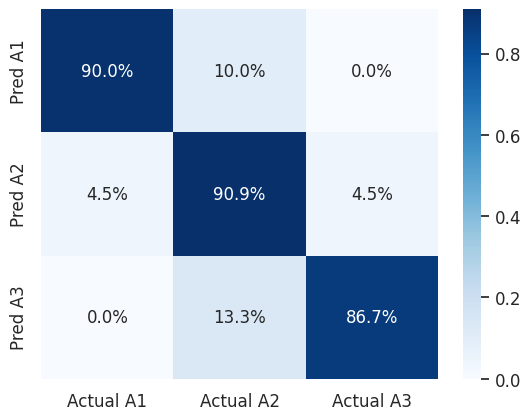

SupervisedTimeSeriesForest 0.9361702127659575
              precision    recall  f1-score   support

         0.0      0.909     1.000     0.952        10
         1.0      0.913     0.955     0.933        22
         2.0      1.000     0.867     0.929        15

    accuracy                          0.936        47
   macro avg      0.941     0.940     0.938        47
weighted avg      0.940     0.936     0.936        47



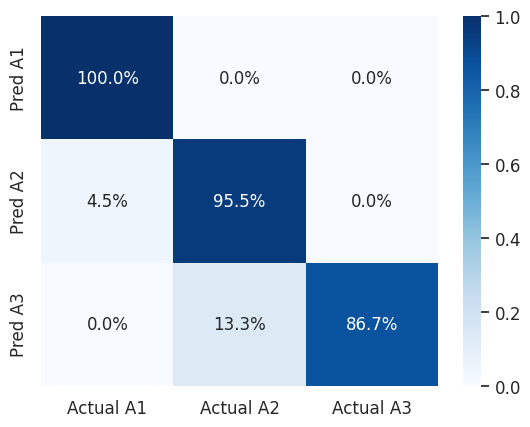

RandomIntervalSpectralEnsemble 0.851063829787234
              precision    recall  f1-score   support

         0.0      0.714     0.500     0.588        10
         1.0      0.808     0.955     0.875        22
         2.0      1.000     0.933     0.966        15

    accuracy                          0.851        47
   macro avg      0.841     0.796     0.810        47
weighted avg      0.849     0.851     0.843        47



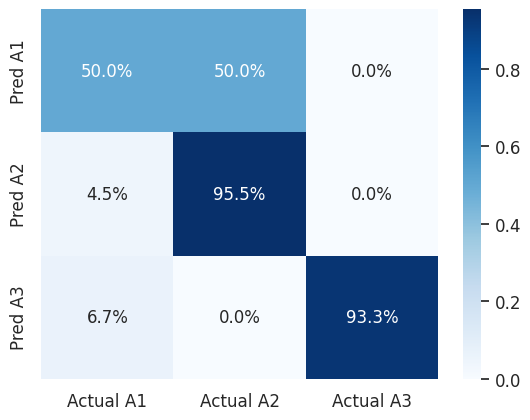

RandomIntervalClassifier 0.9361702127659575
              precision    recall  f1-score   support

         0.0      0.909     1.000     0.952        10
         1.0      0.952     0.909     0.930        22
         2.0      0.933     0.933     0.933        15

    accuracy                          0.936        47
   macro avg      0.932     0.947     0.939        47
weighted avg      0.937     0.936     0.936        47



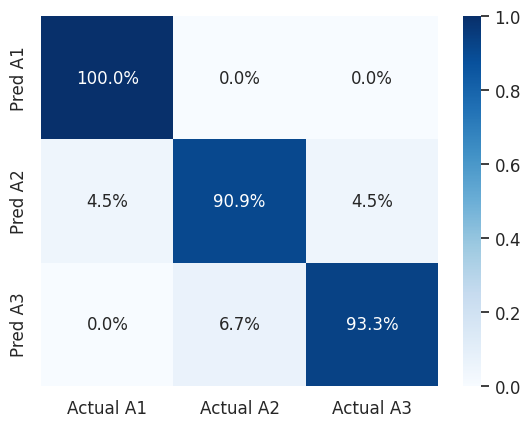

ShapeletTransformClassifier 0.9148936170212766
              precision    recall  f1-score   support

         0.0      0.909     1.000     0.952        10
         1.0      0.909     0.909     0.909        22
         2.0      0.929     0.867     0.897        15

    accuracy                          0.915        47
   macro avg      0.916     0.925     0.919        47
weighted avg      0.915     0.915     0.914        47



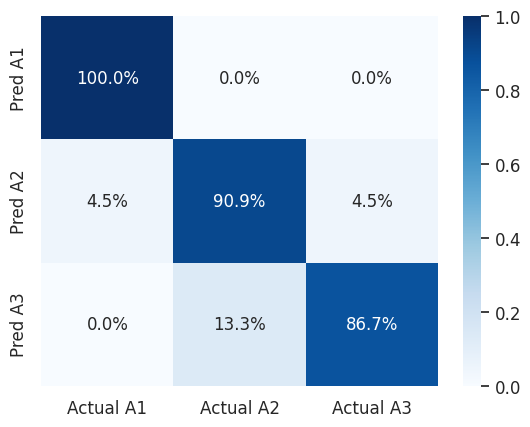

KNeighborsTimeSeriesClassifier 0.7659574468085106
              precision    recall  f1-score   support

         0.0      0.875     0.700     0.778        10
         1.0      0.800     0.727     0.762        22
         2.0      0.684     0.867     0.765        15

    accuracy                          0.766        47
   macro avg      0.786     0.765     0.768        47
weighted avg      0.779     0.766     0.766        47



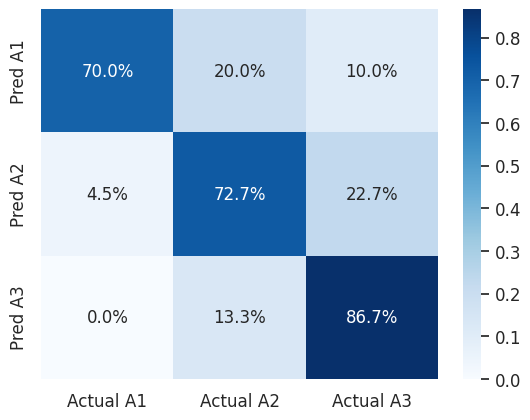

ComposableTimeSeriesForestClassifier 0.9361702127659575
              precision    recall  f1-score   support

         0.0      0.900     0.900     0.900        10
         1.0      0.913     0.955     0.933        22
         2.0      1.000     0.933     0.966        15

    accuracy                          0.936        47
   macro avg      0.938     0.929     0.933        47
weighted avg      0.938     0.936     0.937        47



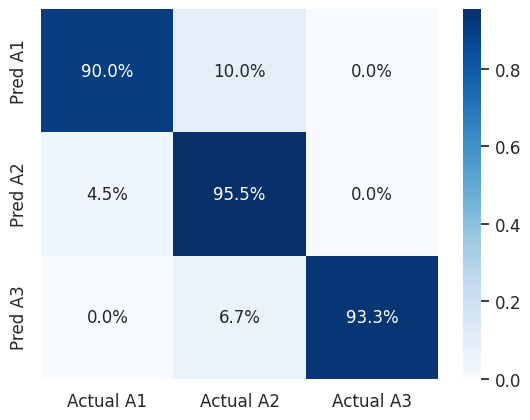

In [76]:
for name, sktime_clf in sktime_clfs.items():
    clf = sktime_clf 
    clf.fit(X_train_nest_std, y_train)
    y_pred = clf.predict(X_test_nest_std)
    print(name, accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))
    plot_confmatrix(y_test, y_pred)

<a id="3D"></a> <br>
### [▲](#3) 3D - SKLearn Classifiers

**Original features**

In [77]:
init_data(100, SEQ_LEN, nest=False, tab=True)
X_train_tab.head()

0           1      2      3           4      5      6           7    \
0  3.051  121.599998  127.0  3.079  121.599998  128.0  3.107  121.599998   
1  4.488  127.599998   98.0  4.955  127.400002   99.0  5.384  127.599998   
2  2.669  108.199997  141.0  2.715  108.000000  141.0  2.753  108.000000   
3  3.256  115.000000  113.0  3.471  115.000000  111.0  3.499  114.599998   
4  5.048  125.199997  131.0  5.263  125.199997  131.0  5.636  124.800003   

     8      9    ...    414         415    416    417         418    419  \
0  128.0  3.135  ...  3.872  121.000000  152.0  3.872  121.400002  154.0   
1   99.0  5.179  ...  5.608  123.800003  146.0  5.878  123.800003  147.0   
2  142.0  2.799  ...  3.984   99.599998  168.0  4.003   99.800003  169.0   
3  111.0  3.891  ...  4.152  111.400002  156.0  3.695  111.800003  156.0   
4  132.0  6.280  ...  3.004  122.599998  160.0  2.566  123.000000  160.0   

     420         421    422    423  
0  3.872  121.599998  156.0  3.872  
1  5.552  123.199997  146.0  5.346  
2  4.012   99.800003  169.0  4.022  
3  3.312  112.199997  156.0  3.200  
4  2.482  123.199997  160.0  2.407  

[5 rows x 424 columns]

In [78]:
sklearn_clfs = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}
sklearn_clfs_std = {
    'RidgeClassifierCV': RidgeClassifierCV(),
    'SupportVectorClassifier': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SGDClassifier': SGDClassifier()
}

RandomForestClassifier 0.8723404255319149
              precision    recall  f1-score   support

         0.0      0.900     0.900     0.900        10
         1.0      0.864     0.864     0.864        22
         2.0      0.867     0.867     0.867        15

    accuracy                          0.872        47
   macro avg      0.877     0.877     0.877        47
weighted avg      0.872     0.872     0.872        47



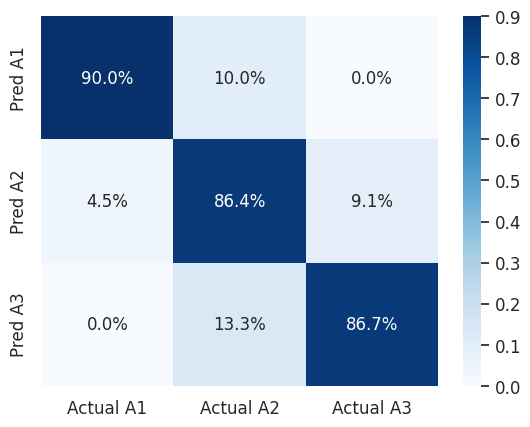

DecisionTreeClassifier 0.7659574468085106
              precision    recall  f1-score   support

         0.0      0.889     0.800     0.842        10
         1.0      0.789     0.682     0.732        22
         2.0      0.684     0.867     0.765        15

    accuracy                          0.766        47
   macro avg      0.788     0.783     0.780        47
weighted avg      0.777     0.766     0.766        47



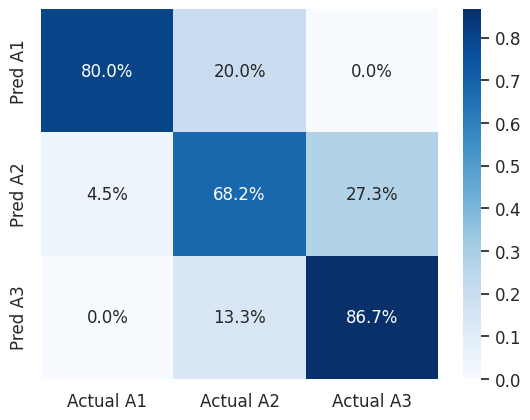

In [79]:
for name, sklearn_clf in sklearn_clfs.items():
    clf = sklearn_clf
    clf.fit(X_train_tab, y_train)
    y_pred = clf.predict(X_test_tab)
    print(name, accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))
    plot_confmatrix(y_test, y_pred)

**Standard features**

In [80]:
init_data(100, SEQ_LEN, nest=False, tab=False, std=True)
X_train_tab_std.head()

0         1         2         3         4         5         6    \
0 -0.591066 -0.069681  0.463112 -0.602251 -0.069015  0.490743 -0.596551   
1  0.028684  0.058756 -1.019125  0.225845  0.055238 -0.995004  0.413159   
2 -0.755816 -0.356523  1.178675 -0.762927 -0.360367  1.156768 -0.753529   
3 -0.502654 -0.210961 -0.252451 -0.429216 -0.210407 -0.380212 -0.422723   
4  0.270201  0.007381  0.667559  0.361801  0.008107  0.644441  0.524906   

        7         8         9    ...       414       415       416       417  \
0 -0.066364  0.460156 -0.608684  ... -0.289398 -0.077851  0.569746 -0.295924   
1  0.062046 -1.015205  0.311243  ...  0.514816 -0.018045  0.293024  0.629238   
2 -0.357426  1.172399 -0.759905  ... -0.237513 -0.534942  1.307673 -0.235507   
3 -0.216175 -0.404711 -0.268437  ... -0.159686 -0.282901  0.754228 -0.377556   
4  0.002122  0.663654  0.806762  ... -0.691504 -0.043676  0.938710 -0.898248   

        418       419       420       421       422       423  
0 -0.068907  0.664246 -0.296310 -0.063828  0.758598 -0.301472  
1 -0.017655  0.339814  0.485325 -0.029649  0.290651  0.387419  
2 -0.530179  1.359457 -0.231173 -0.529521  1.366928 -0.231368  
3 -0.273917  0.756941 -0.556855 -0.264632  0.758598 -0.615539  
4 -0.034739  0.942330 -0.943020 -0.029649  0.945777 -0.986157  

[5 rows x 424 columns]

RidgeClassifierCV 0.7446808510638298
              precision    recall  f1-score   support

         0.0      0.875     0.700     0.778        10
         1.0      0.727     0.727     0.727        22
         2.0      0.706     0.800     0.750        15

    accuracy                          0.745        47
   macro avg      0.769     0.742     0.752        47
weighted avg      0.752     0.745     0.745        47



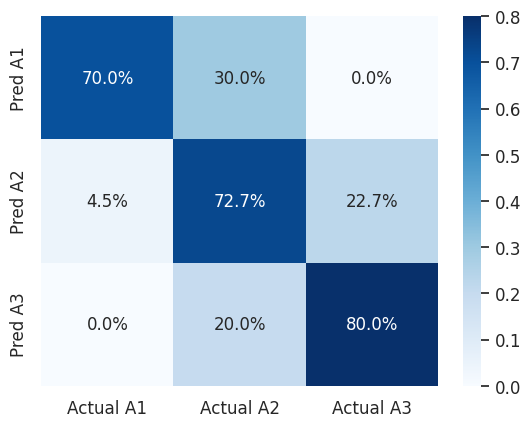

SupportVectorClassifier 0.8723404255319149
              precision    recall  f1-score   support

         0.0      0.909     1.000     0.952        10
         1.0      0.900     0.818     0.857        22
         2.0      0.812     0.867     0.839        15

    accuracy                          0.872        47
   macro avg      0.874     0.895     0.883        47
weighted avg      0.874     0.872     0.872        47



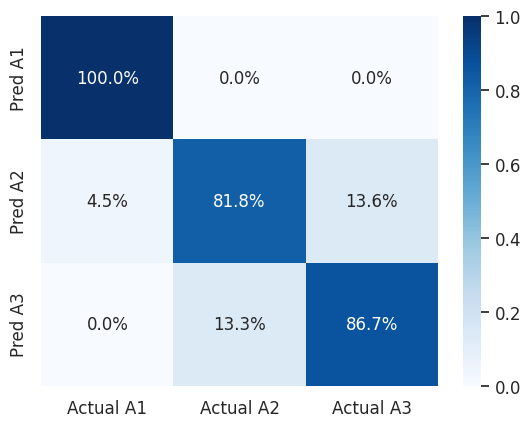

KNeighborsClassifier 0.723404255319149
              precision    recall  f1-score   support

         0.0      0.900     0.900     0.900        10
         1.0      0.737     0.636     0.683        22
         2.0      0.611     0.733     0.667        15

    accuracy                          0.723        47
   macro avg      0.749     0.757     0.750        47
weighted avg      0.731     0.723     0.724        47



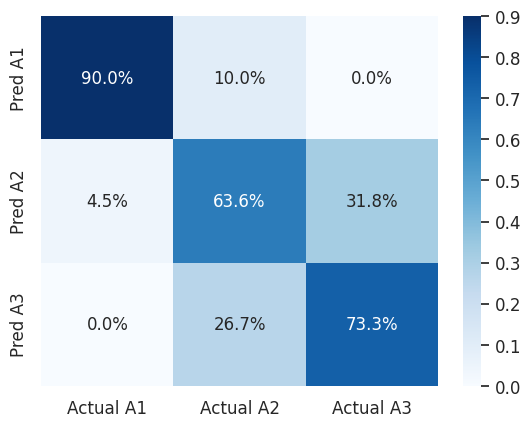

GradientBoostingClassifier 0.8297872340425532
              precision    recall  f1-score   support

         0.0      0.889     0.800     0.842        10
         1.0      0.818     0.818     0.818        22
         2.0      0.812     0.867     0.839        15

    accuracy                          0.830        47
   macro avg      0.840     0.828     0.833        47
weighted avg      0.831     0.830     0.830        47



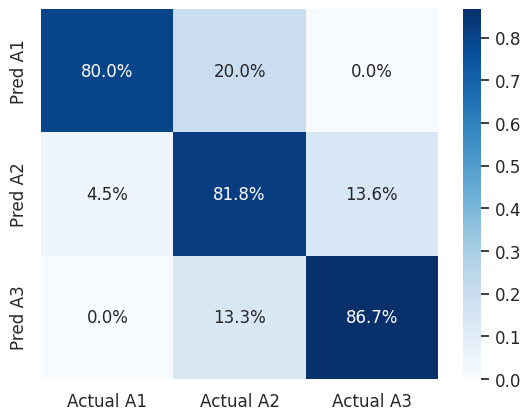

SGDClassifier 0.723404255319149
              precision    recall  f1-score   support

         0.0      0.800     0.800     0.800        10
         1.0      0.765     0.591     0.667        22
         2.0      0.650     0.867     0.743        15

    accuracy                          0.723        47
   macro avg      0.738     0.753     0.737        47
weighted avg      0.736     0.723     0.719        47



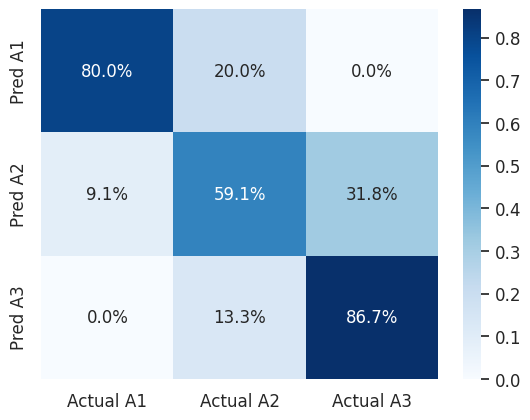

In [81]:
for name, sklearn_clf in sklearn_clfs_std.items():
    clf = sklearn_clf
    clf.fit(X_train_tab_std, y_train)
    y_pred = clf.predict(X_test_tab_std)
    print(name, accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))
    plot_confmatrix(y_test, y_pred)

<a id="3E"></a> <br>
### [▲](#3) 3E - Combined Classification

**Functions**

In [82]:
'''
Creates list of column names according to the parameters
- @general: Start of the column name
- @num: Identification number for column
Output for function call create_col_names(general='Score', num=3) 
=> ['Score 1','Score 2', 'Score 3']
'''
def create_col_names(general, num, info=False):
    col_names = []
    for i in range(1,num+1):
        col_names.append(general + str(i))
    
    if info: print("Columns created: ", col_names)
    
    return col_names

In [83]:
def classify(classifiers, clf_type, X_train, X_test, y_train, y_test, results, iters):
    # Pandas dataframe for results
    if results is None:
        results = pd.DataFrame(columns=['Classifier','Type','Train(t)','Test(t)'])
    
    # Create column names for scores according to the number of iterations
    score_col_names = create_col_names('Score_', iters)
    
    # Create progress bar with non-default styles
    progress_bar = tqdm(classifiers.items(), ncols=100, colour='#87ceeb', file=sys.stdout)
    
    for name, clf in progress_bar:
        progress_bar.set_description("Processing \033[1m ➥%s \033[0m" % str(clf)) # Includes bold text printing
        score_row = pd.DataFrame(data={'Classifier':name,'Type':clf_type,}, index=[0])
        
        # Insert score colums for each iterations
        for i in range(1,iters+1):
            score_row[score_col_names] = 0
        
        best_score = 0

        for iter in range(1,iters+1):
            start = time() # Start timing the model
            clf.fit(X_train, y_train)
            train_time = time() - start # Stop train timer
            start = time()              # Start test timer
            # Predictions
            y_pred = clf.predict(X_test)
            # Model scores
            score = accuracy_score(y_test, y_pred)
            score_time = time()-start
            # Set values (note: time data will be overwritten in each iteration)
            score_row['Train(t)'] = train_time
            score_row['Test(t)'] = score_time
            score_row[score_col_names[iter-1]] = score
            # Among iterations, we could take only one mse, f1 and roc. We store them for the best accuracy.
            if score > best_score:
                # More metrics
                # MSE, F1 and ROC-AUC scores
                score_row['mse'] = mean_squared_error(y_test, y_pred)
                score_row['f1'] = f1_score(y_test, y_pred, average='micro')
                if clf_type in ['sktime','sklearn-tree']:
                    y_pred_proba = clf.predict_proba(X_test)
                    score_row['roc-auc'] = roc_auc_score(y_test, y_pred_proba, average="weighted", multi_class="ovr")
                else:
                    score_row['roc-auc'] = np.nan
                best_score = score
            
        results = pd.concat((results, score_row), axis=0, ignore_index=True)
        
    print('Classification done for ' + clf_type + '\n')
    
    return results

#### Classification

**Data variable initialization**

In [84]:
init_data(100, SEQ_LEN, nest=True, tab=True, std=True)

X: (232, 424)  y: (232,)
Train: (185, 424) (185,) Test: (47, 424) (47,)
X: (232, 424)  y: (232,)
Train: (185, 424) (185,) Test: (47, 424) (47,)


<div style="display: flex; padding: 15px; align-items: center; background-color: skyblue; height: 60px; border-radius: 5px; width: 96%;">
    <h3 style="font-size: 20px;"><b>Classify</b></h3>
</div>

In [85]:
ITERS = 3
#Please Note, this may take a time about ~15 min with 1 iteration and 500 features
results = classify(sktime_clfs, 'sktime', X_train_nest_std, X_test_nest_std, y_train, y_test, results=None, iters=ITERS)
results = classify(sklearn_clfs, 'sklearn-tree', X_train_tab, X_test_tab, y_train, y_test, results=results, iters=ITERS)
results = classify(sklearn_clfs_std, 'sklearn', X_train_tab_std, X_test_tab_std, y_train, y_test, results=results, iters=ITERS)

Processing  ➥ComposableTimeSeriesForestClassifier() : 100%|██████████| 7/7 [37:13<00:00, 319.07s/it]
Classification done for sktime

Processing  ➥DecisionTreeClassifier() : 100%|█████████████████████████| 2/2 [00:00<00:00,  2.91it/s]
Classification done for sklearn-tree

Processing  ➥SGDClassifier() : 100%|██████████████████████████████████| 5/5 [00:12<00:00,  2.46s/it]
Classification done for sklearn



<div style="display: block; justify-content: center; padding: 15px; align-items: center; background-color: skyblue; height: auto; border-radius: 5px; width: 96%;">
    <h3 style="font-size: 20px;"><b>Results</b></h3>
    <p>The following results are with minimum sequence length of 500 (for limit 500 the shortest sequence is 524).<br>Segments are from the interval [100-524].<br>Because we use minimum activity length as the sequence end index for all the activities, our practical equalized sequence length is 424</p>
</div>

In [86]:
# Statistics for the scores
score_col_names = create_col_names('Score_', ITERS)
results['Score Best'] = results[score_col_names].max(axis=1)
results['Variance'] = results[score_col_names].var(axis=1)
results['Std'] = results[score_col_names].std(axis=1)

# Sort values
sorted_results = results.sort_values(by='Score Best', ascending=False)
# Style setup
sorted_results.style.format(precision=3)
sorted_results.style.set_properties(subset=['Score Best'], **{'font-weight': 'bold'})

<div style="display: block; justify-content: center; padding: 15px; align-items: center; background-color: skyblue; height: auto; border-radius: 5px;  width: 96%;">
    <h3 style="font-size: 20px;"><b>Conclusions</b></h3>
    <p style="font-size: 16px">Randomness achieved tolerable or moderate level after removing some problematic activities (missing HR data etc.) and using "forward filling" (ffill) method of pandas data frame (instead of replacing missing values by zero). Estimate for variance of accuracy in sktime is 1-2%, depending on model. However e.g. ComposableTimeSeriesForestClassifier resulted 0.796 and 0.878. For Classical ML models variance is also approximately 2-8% between different executions.<br><br>
    For score variance among executions we need to notice, that when having only 47 instances for test data, one misclassified case affect to the accuracy score by ~2.1 percents. Therefore, quite significant variance even ~10% is understandable and not so easy to be balanced considering very challenging dataset we are using.<br><br>
    Note: We use the same Train and Test data when applying `classifier.fit(X_train, Y_train)`. Score variance therefore maybe comes from the classifier's own default random state property.<br><br>
    Latest results are gained after replacing pandas `pd.fillna(method='ffill')` by `pd.interpolate(method='linear', direction=''both')`. That was actually the case from which we discussed in the seminar meeting.  </p>
</div>

---

<a id="4"></a> <br>
## [▲](#CT) 4 - Test Section

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
# Some extra time series classifiers from sktime
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.feature_based import SummaryClassifier
# Data transformation tools from sktime
from sktime.transformations.panel.compose import ColumnConcatenator
from sktime.transformations.panel.segment import RandomIntervalSegmenter
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
from sktime.transformations.compose import FeatureUnion
# Model tuning tools
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Dataset for testing purposes
from sktime.datasets import load_basic_motions

**Reset data if needed**

In [88]:
init_data(100, SEQ_LEN, nest=False, tab=True, std=True)

<a id="4A"></a> <br>
### [▲](#4) 4A - Pipeline with data transformers

#### Time Series Forest Classifier

In [89]:
steps = [
    ("concatenate", ColumnConcatenator()),
    # ("slope", ShapeletTransform()), # ("intervals", RandomIntervalSegmenter()), # ShapeletTransform does not finish
    ("classify", TimeSeriesForestClassifier(n_estimators=100)),
]

clf_ = Pipeline(steps)
clf_.fit(X_train_nest_std, y_train)
print(clf_.score(X_test_nest_std, y_test))

/home/codespace/.python/current/lib/python3.10/site-packages/sktime/datatypes/_panel/_convert.py:713: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _label, _series in multi_ind_dataframe.iteritems():  # noqa
/home/codespace/.python/current/lib/python3.10/site-packages/sktime/datatypes/_panel/_convert.py:713: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _label, _series in multi_ind_dataframe.iteritems():  # noqa


0.8936170212765957


In [90]:
clf_.steps[-1][-1].feature_importances_

array([0.00865377, 0.00852269, 0.04167345, 0.0059666 , 0.01128593,
       0.02903788, 0.00254739, 0.0080997 , 0.03064036, 0.00694791,
       0.00962937, 0.0405767 , 0.00418318, 0.00742563, 0.03499451,
       0.00720331, 0.00912389, 0.03526127, 0.00576231, 0.00929436,
       0.03413337, 0.00695469, 0.01205115, 0.03187105, 0.00692365,
       0.01191452, 0.03647175, 0.00493124, 0.01006202, 0.03526188,
       0.00744868, 0.01092368, 0.03456893, 0.004188  , 0.00845855,
       0.01987589, 0.00457986, 0.00336164, 0.03492965, 0.00601086,
       0.01198722, 0.03513846, 0.00618948, 0.00863164, 0.02858839,
       0.00550131, 0.01013463, 0.04012138, 0.00665618, 0.01043467,
       0.03100866, 0.00878013, 0.00812999, 0.03600928, 0.01001692,
       0.01062798, 0.02966642, 0.00639631, 0.01212728, 0.04210239])

In [91]:
len(clf_.steps[-1][-1].intervals_)

100

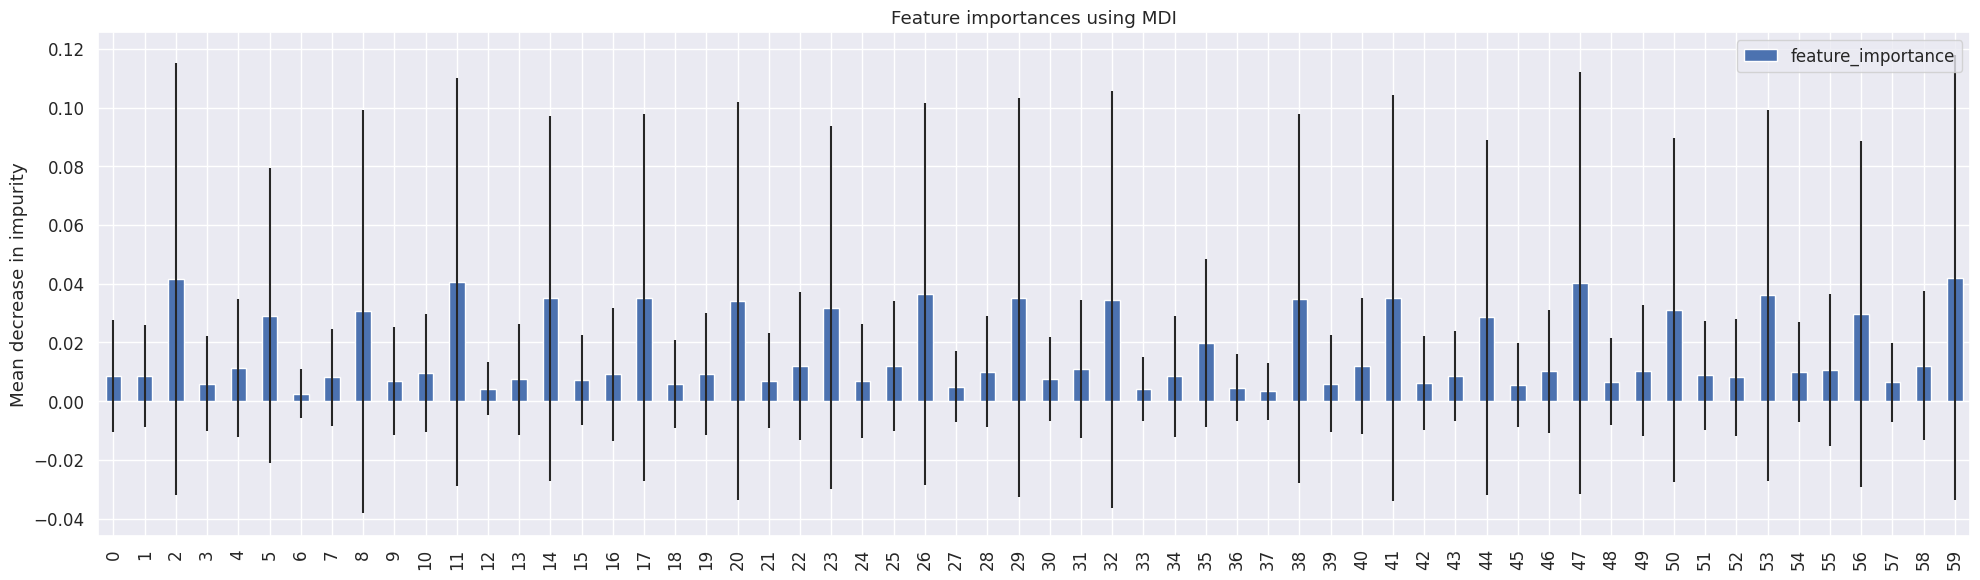

In [92]:
std = np.std([tree.feature_importances_ for tree in clf_.steps[-1][-1].estimators_], axis=0)
feat_imps = pd.DataFrame(clf_.steps[-1][-1].feature_importances_, columns=['feature_importance'])
fig, ax = plt.subplots(figsize=(20,6))
feat_imps.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
#feat_imps.plot.bar(xlabel="time", ylabel="feature importance")

#### Interval Based: ComposableTimeSeriesForestClassifier

/home/codespace/.python/current/lib/python3.10/site-packages/sktime/datatypes/_panel/_convert.py:713: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _label, _series in multi_ind_dataframe.iteritems():  # noqa
/home/codespace/.python/current/lib/python3.10/site-packages/sktime/datatypes/_panel/_convert.py:713: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _label, _series in multi_ind_dataframe.iteritems():  # noqa


0.9361702127659575


<AxesSubplot: xlabel='time', ylabel='feature importance'>

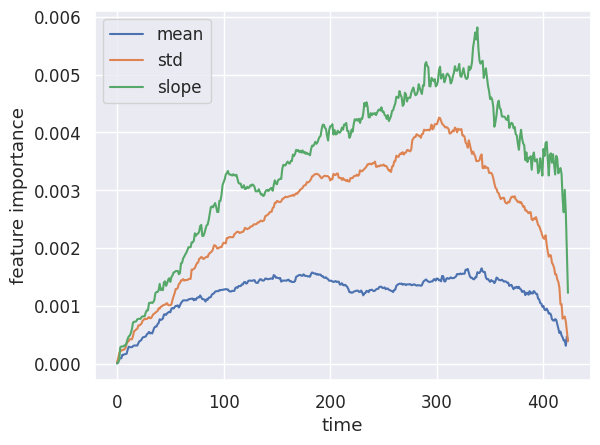

In [93]:
steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", ComposableTimeSeriesForestClassifier(n_estimators=100)),
]

clf_ctsf = Pipeline(steps)
clf_ctsf.fit(X_train_nest_std, y_train)
print(clf_ctsf.score(X_test_nest_std, y_test))

clf_ctsf.steps[-1][-1].feature_importances_.rename(columns={"_slope": "slope"}).plot(xlabel="time", ylabel="feature importance")

<AxesSubplot: xlabel='time', ylabel='feature importance'>

<Figure size 1200x500 with 0 Axes>

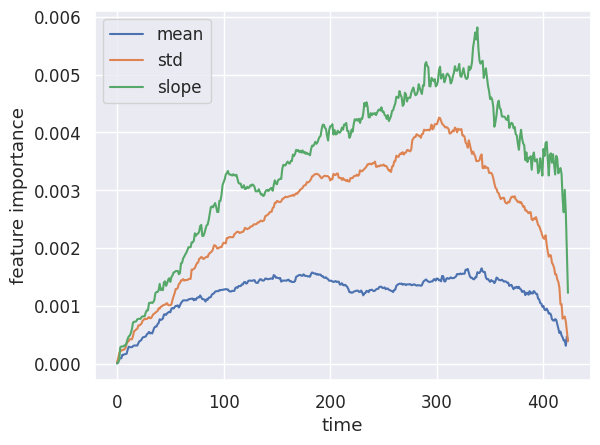

In [94]:
fig = plt.figure(figsize=(12,5))
clf_ctsf.steps[-1][-1].feature_importances_.rename(columns={"_slope": "slope"}).plot(xlabel="time", ylabel="feature importance")

**Slope info**

In mathematics, the *slope* or *gradient of a line* is a number that describes both the *direction* and the *steepness* of the line

https://en.wikipedia.org/wiki/Slope


<a id="4B"></a> <br>
### [▲](#4) 4B - TSA in Heart Rate

#### Create sequences from the raw data

Error message for `hr_seqs = get_sequences(DATA_PATH, ENTRIES, ['HeartRate'], info=True)`

TypeError: Cannot interpolate with all object-dtype columns in the DataFrame. Try setting at least one column to a numeric dtype.

In [95]:
hr_seqs = get_sequences(DATA_PATH, ENTRIES, ['HeartRate'], info=True)

rm_index = []
len_lim = 500
hr_lim = 100

for i, s in zip(range(0,len(hr_seqs)), hr_seqs):
    hr_values = np.asarray(s[:,0], dtype=int)

    if len(s) < len_lim:
        rm_index.append(i)
    else:
        # For debug, print mean values
        #print(hr_values.mean(), spd_values.mean(), alt_values.mean())
        if hr_values.mean() <= hr_lim:
            rm_index.append(i)

print(len(rm_index), rm_index)

hr_target_filtered_idx = [index for index in TARGETS.index if index not in rm_index]
print('len() =', len(hr_target_filtered_idx), hr_target_filtered_idx)

Created 297 sequences from 297 entries
63 [2, 3, 5, 6, 7, 9, 13, 18, 19, 28, 29, 34, 37, 45, 46, 58, 61, 65, 67, 73, 89, 91, 93, 98, 105, 108, 109, 118, 119, 120, 122, 124, 131, 133, 134, 136, 138, 139, 146, 150, 159, 161, 179, 207, 208, 212, 218, 221, 226, 227, 228, 231, 232, 234, 236, 239, 248, 249, 250, 252, 272, 288, 290]
len() = 234 [0, 1, 4, 8, 10, 11, 12, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 62, 63, 64, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 121, 123, 125, 126, 127, 128, 129, 130, 132, 135, 137, 140, 141, 142, 143, 144, 145, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,

In [96]:
idx_data = pd.DataFrame(columns=['org_index','label'])
idx_data['org_index'] = np.array(hr_target_filtered_idx)
idx_data['label'] = TARGETS['activity_name'][hr_target_filtered_idx].values

In [97]:
hr_seqs_filtered = np.array(hr_seqs, dtype=object)[hr_target_filtered_idx]
len(hr_seqs_filtered), len(hr_target_filtered_idx)

(234, 234)

#### Sequence visualization

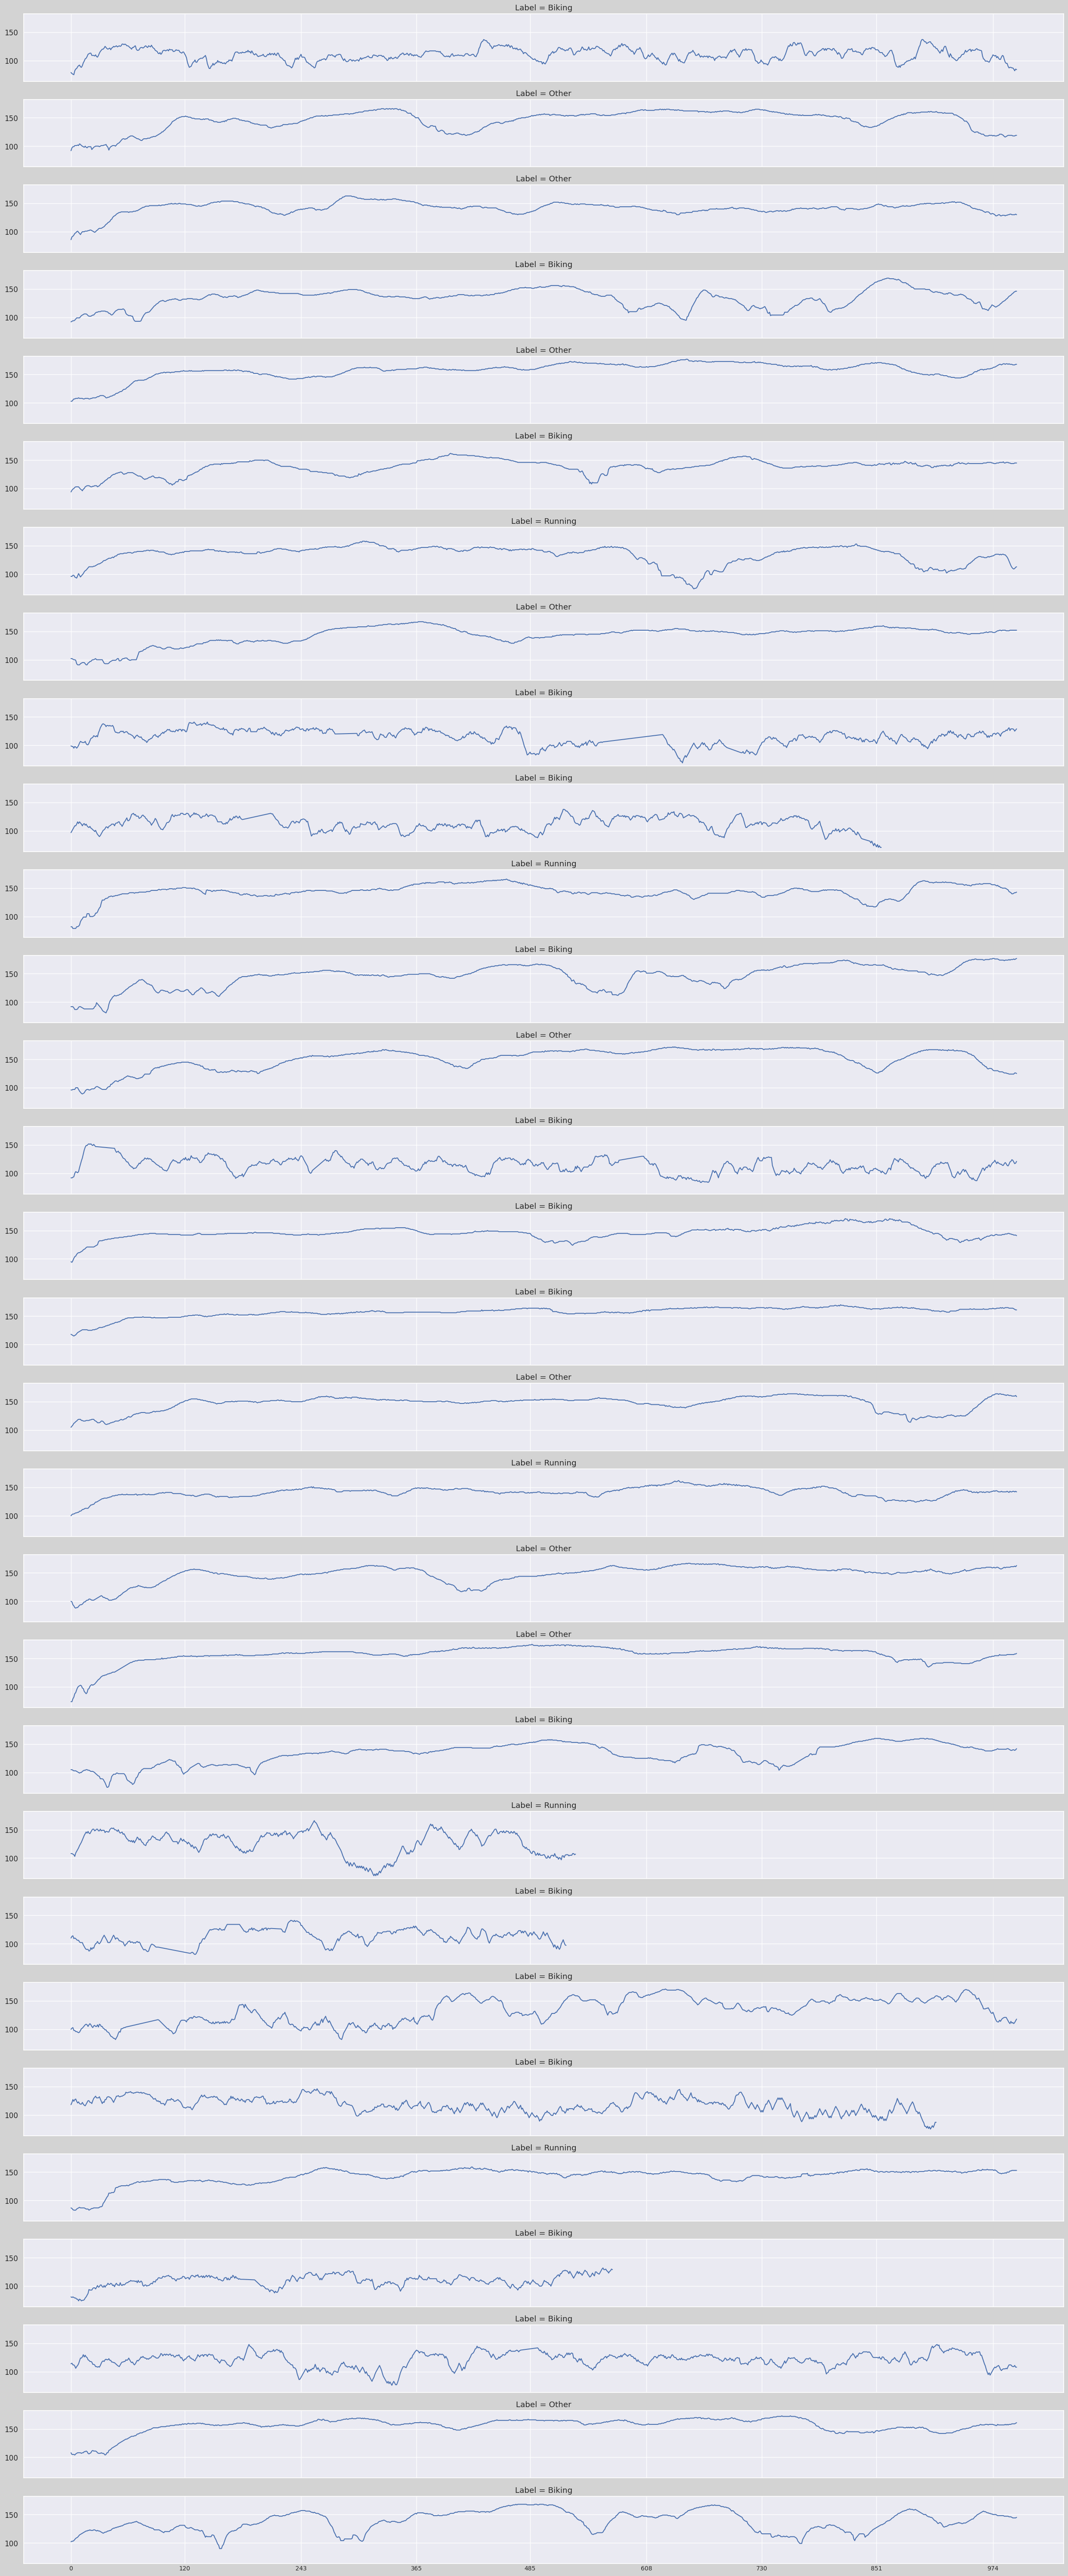

In [98]:
N = 30
# You may try without  or with sharey and sharex combinations
fig, ax = plt.subplots(nrows=N, ncols=1, sharex=True, sharey=True, figsize=(25, N*2)) 
fig.patch.set_facecolor('lightgray')

for i, (seq, ax) in enumerate(zip(hr_seqs_filtered[0:N],fig.axes)):
    seq = seq.reshape(-1)[0:1000]
    sns.lineplot(data=seq, ax=ax).set_title("Label = " + str(idx_data['label'][i]))
    ax.tick_params(axis="x", labelsize=10, length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        
fig.tight_layout()
plt.show()

In [99]:
print("(" + str(hr_seqs_filtered.shape[0]) + ", ?, " + str(hr_seqs_filtered[0].shape[1]) +")" )

(234, ?, 1)


In [100]:
sequence_analysis(hr_seqs_filtered)

count      234.000000
mean      4664.333333
std       2927.956199
min        524.000000
25%       2834.250000
50%       4452.500000
75%       5992.000000
max      19781.000000
dtype: float64

#### Create dataset from the sequences

In [101]:
# The whole data (standard)
x_hrdata_std, y_hrdata = create_dataset(hr_seqs_filtered, idx_data, seq_start=100, seq_end=524, std=True, info=False)
# Train-Test data splits (standard)
x_hrtrain_std, x_hrtest_std, y_hrtrain, y_hrtest = train_test_split(x_hrdata_std, y_hrdata, test_size=0.2, random_state=24, stratify=y_hrdata, shuffle=True)
print('Train:', x_hrtrain_std.shape, y_hrtrain.shape, 'Test:', x_hrtest_std.shape, y_hrtest.shape)
# Nested
X_hrtrain_nest_std = from_2d_array_to_nested(x_hrtrain_std)
X_hrtest_nest_std  = from_2d_array_to_nested(x_hrtest_std)

X: (234, 424)  y: (234,)
Train: (187, 424) (187,) Test: (47, 424) (47,)


#### Time Series Classification

In [102]:
hr_results = classify(sktime_clfs, 'sktime', X_hrtrain_nest_std, X_hrtest_nest_std, y_hrtrain, y_hrtest, results=None, iters=3)

Processing  ➥ComposableTimeSeriesForestClassifier() : 100%|██████████| 7/7 [39:06<00:00, 335.22s/it]
Classification done for sktime



In [103]:
score_col_names = create_col_names('Score_', 3)
hr_results['Score Best'] = hr_results[score_col_names].max(axis=1)
hr_results['Score Avg'] = hr_results[score_col_names].mean(axis=1)
hr_results.sort_values(by="Score Best", ascending=False)

Classifier    Type    Train(t)    Test(t)  \
3              RandomIntervalClassifier  sktime  104.781835  10.328398   
1            SupervisedTimeSeriesForest  sktime   33.352895   3.037486   
6  ComposableTimeSeriesForestClassifier  sktime  358.419125  40.155269   
0            TimeSeriesForestClassifier  sktime    3.656259   0.819715   
4           ShapeletTransformClassifier  sktime  154.489583   6.105166   
2        RandomIntervalSpectralEnsemble  sktime   19.223124   2.680558   
5        KNeighborsTimeSeriesClassifier  sktime    1.043506  11.963424   

    Score_1   Score_2   Score_3       mse        f1   roc-auc  Score Best  \
3  0.723404  0.723404  0.808511  0.255319  0.808511  0.848520    0.808511   
1  0.659574  0.744681  0.680851  0.382979  0.744681  0.853542    0.744681   
6  0.702128  0.702128  0.680851  0.361702  0.702128  0.815922    0.702128   
0  0.680851  0.680851  0.680851  0.446809  0.680851  0.835423    0.680851   
4  0.659574  0.617021  0.531915  0.468085  0.659574  0.800813    0.659574   
2  0.510638  0.489362  0.553191  0.446809  0.553191  0.779205    0.553191   
5  0.489362  0.489362  0.489362  0.702128  0.489362  0.600557    0.489362   

   Score Avg  
3   0.751773  
1   0.695035  
6   0.695035  
0   0.680851  
4   0.602837  
2   0.517730  
5   0.489362

In [104]:
tabu = Tabularizer()
X_hrtrain_tab_std = tabu.fit_transform(X_hrtrain_nest_std)
X_hrtest_tab_std = tabu.fit_transform(X_hrtest_nest_std)

In [105]:
hr_results_sklearn = classify(sklearn_clfs, 'sklearn-tree', X_hrtrain_tab_std, X_hrtest_tab_std, y_hrtrain, y_hrtest, results=None, iters=3)
hr_results_sklearn = classify(sklearn_clfs_std, 'sklearn', X_hrtrain_tab_std, X_hrtest_tab_std, y_hrtrain, y_hrtest, results=hr_results_sklearn, iters=3)

Processing  ➥DecisionTreeClassifier() : 100%|█████████████████████████| 2/2 [00:00<00:00,  2.57it/s]
Classification done for sklearn-tree

Processing  ➥SGDClassifier() : 100%|██████████████████████████████████| 5/5 [00:10<00:00,  2.16s/it]
Classification done for sklearn



In [107]:
hr_results_sklearn['Score Best'] = hr_results_sklearn[score_col_names].max(axis=1)
hr_results_sklearn['Score Avg'] = hr_results_sklearn[score_col_names].mean(axis=1)
hr_results_sklearn.sort_values(by="Score Best", ascending=False)

Classifier          Type  Train(t)   Test(t)   Score_1  \
3     SupportVectorClassifier       sklearn  0.008194  0.005443  0.765957   
0      RandomForestClassifier  sklearn-tree  0.184388  0.012184  0.638298   
1      DecisionTreeClassifier  sklearn-tree  0.032987  0.003865  0.638298   
4        KNeighborsClassifier       sklearn  0.004115  0.005840  0.595745   
6               SGDClassifier       sklearn  0.014362  0.003427  0.319149   
5  GradientBoostingClassifier       sklearn  3.432631  0.004564  0.531915   
2           RidgeClassifierCV       sklearn  0.070656  0.007228  0.510638   

    Score_2   Score_3       mse        f1   roc-auc  Score Best  Score Avg  
3  0.765957  0.765957  0.297872  0.765957       NaN    0.765957   0.765957  
0  0.680851  0.702128  0.361702  0.702128  0.798053    0.702128   0.673759  
1  0.553191  0.574468  0.489362  0.638298  0.696959    0.638298   0.588652  
4  0.595745  0.595745  0.531915  0.595745       NaN    0.595745   0.595745  
6  0.531915  0.553191  0.829787  0.553191       NaN    0.553191   0.468085  
5  0.531915  0.531915  0.595745  0.531915       NaN    0.531915   0.531915  
2  0.510638  0.510638  0.553191  0.510638       NaN    0.510638   0.510638

<a id="4C"></a> <br>
### [▲](#4) 4C - Hyperparameter tuning test for single models

In [108]:
# Gets the model and parameters
svm_clf = SVC(probability=True)
param_grid = {'C': [0.5, 1, 10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001, 0.0005],
              'kernel': ['poly', 'rbf', 'sigmoid','linear']}

# Grid Search cross-validation settings
clf_search = GridSearchCV(estimator=svm_clf,
                              verbose=1,
                              param_grid=param_grid,
                              cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))


# Fit the data with different random splits
print("\033[1mGridSearchCV settings\033[0m\n" + str(clf_search) + "\n")
clf_search.fit(X_train_tab_std, y_train)
svm_best = clf_search.best_estimator_
y_pred = svm_best.predict(X_test_tab_std)
y_pred_proba = svm_best.predict_proba(X_test_tab_std)
# Accuracy and F1 scores
acc = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
# Print some scores
print("➥ ITER(1): acc: %s, mse: %s f1: %s ▼"%(acc, mse, f1))

GridSearchCV settings
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(probability=True),
             param_grid={'C': [0.5, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0005],
                         'kernel': ['poly', 'rbf', 'sigmoid', 'linear']},
             verbose=1)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
➥ ITER(1): acc: 0.8936170212765957, mse: 0.10638297872340426 f1: 0.8936170212765957 ▼


In [109]:
clf_search.best_params_

{'C': 10, 'gamma': 0.0005, 'kernel': 'rbf'}

In [110]:
y_pred_proba

array([[9.75346669e-01, 1.87153730e-02, 5.93795807e-03],
       [4.15530020e-03, 9.88373640e-01, 7.47106026e-03],
       [9.59945825e-01, 3.51428436e-02, 4.91133136e-03],
       [8.18907009e-03, 5.81284995e-01, 4.10525935e-01],
       [7.53193929e-03, 1.00948122e-01, 8.91519939e-01],
       [1.75641089e-02, 9.78689505e-01, 3.74638641e-03],
       [2.12722523e-02, 3.36553945e-02, 9.45072353e-01],
       [3.00399770e-03, 9.85004198e-01, 1.19918039e-02],
       [9.85920765e-01, 9.76580806e-03, 4.31342679e-03],
       [8.56952732e-01, 1.19236879e-01, 2.38103890e-02],
       [1.57729959e-02, 9.52451658e-01, 3.17753459e-02],
       [2.45268157e-02, 7.89788109e-02, 8.96494373e-01],
       [7.24695147e-03, 9.34216035e-01, 5.85370140e-02],
       [5.79412913e-03, 9.33407514e-01, 6.07983572e-02],
       [1.11435016e-02, 6.83693614e-01, 3.05162884e-01],
       [5.40273729e-03, 4.90805809e-02, 9.45516682e-01],
       [9.42352775e-04, 3.13978904e-01, 6.85078743e-01],
       [8.59913839e-01, 1.27552

<a id="4D"></a> <br>
### [▲](#4) 4D - ROC AUC score for multiclass classification

Another commonly used metric in binary classification is the Area Under the Receiver Operating Characteristic Curve (ROC AUC or AUROC). It quantifies the model’s ability to distinguish between each class. The metric is only used with classifiers that can generate class membership probabilities.

* This is implemented in main classification function.
* We left space here yet for ROC-AUC score visualization.

<a id="4E"></a> <br>
### [▲](#4) 4E - Data selection function

```python
TODO: Write a function that will select best activities from the dataset
    1. Define measures to determine high quality activity for each category
    2. Select 25-30 activities for each category
```

<a id="4F"></a> <br>
### [▲](#4) 4F - Column based classification (Tests for column ensemble)

Pseudocode for column based classification

```python
dataset = GetData(hearrate, speed, altitude)

for activities in dataset:
    
    do: Filter activities by category (Running, Biking, Other)
    
    for each category:
        do: initialize empty data frames
        HR = dataframe_HR
        SPD = dataframe_SPD
        ALT = dataframe_ALT
        
        for each activity in category:
            do: Combine feature time series from activity to corresponding data frame (columnwise => HR, SPD, ALT) 
                
        for (HR, SPD, ALT):
            do: Transform feature dataframes from 2d to nested
            do or: combine nested features as a dimensions to the single dataframe
```

**Column Ensemble Classifier**

https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.classification.compose.ColumnEnsembleClassifier.html

In [ ]:
'''
from sktime.classification.dictionary_based import ContractableBOSS
from sktime.classification.interval_based import CanonicalIntervalForest
from sktime.datasets import load_basic_motions

X_train, y_train = load_basic_motions(split="train")
X_test, y_test = load_basic_motions(split="test")

cboss = ContractableBOSS(
    n_parameter_samples=4, max_ensemble_size=2, random_state=0
)
cif = CanonicalIntervalForest(
    n_estimators=2, n_intervals=4, att_subsample_size=4, random_state=0
)

estimators = [("cBOSS", cboss, 5), ("CIF", cif, [3, 4])]

col_ens = ColumnEnsembleClassifier(estimators=estimators)
col_ens.fit(X_train, y_train)

y_pred = col_ens.predict(X_test)
print(name, accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))
plot_confmatrix(y_test, y_pred)
'''

'\nfrom sktime.classification.dictionary_based import ContractableBOSS\nfrom sktime.classification.interval_based import CanonicalIntervalForest\nfrom sktime.datasets import load_basic_motions\n\nX_train, y_train = load_basic_motions(split="train")\nX_test, y_test = load_basic_motions(split="test")\n\ncboss = ContractableBOSS(\n    n_parameter_samples=4, max_ensemble_size=2, random_state=0\n)\ncif = CanonicalIntervalForest(\n    n_estimators=2, n_intervals=4, att_subsample_size=4, random_state=0\n)\n\nestimators = [("cBOSS", cboss, 5), ("CIF", cif, [3, 4])]\n\ncol_ens = ColumnEnsembleClassifier(estimators=estimators)\ncol_ens.fit(X_train, y_train)\n\ny_pred = col_ens.predict(X_test)\nprint(name, accuracy_score(y_test, y_pred))\nprint(classification_report(y_test, y_pred, digits=3))\nplot_confmatrix(y_test, y_pred)\n'

**NOTE:** Here we need different type of data

In [ ]:
'''
clf = ColumnEnsembleClassifier( estimators=[
                                    ("STSF", SupervisedTimeSeriesForest(), [0]),                      # column 1
                                    ("TSFC", TimeSeriesForestClassifier(n_estimators=200), [1]),      # column ...
                                    ("RISE", RandomIntervalSpectralEnsemble(n_estimators=200), [2]),  # column n
                                ])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))
plot_confmatrix(y_test, y_pred)
'''

'\nclf = ColumnEnsembleClassifier( estimators=[\n                                    ("STSF", SupervisedTimeSeriesForest(), [0]),                      # column 1\n                                    ("TSFC", TimeSeriesForestClassifier(n_estimators=200), [1]),      # column ...\n                                    ("RISE", RandomIntervalSpectralEnsemble(n_estimators=200), [2]),  # column n\n                                ])\nclf.fit(X_train, y_train)\n\ny_pred = clf.predict(X_test)\nprint(accuracy_score(y_test, y_pred))\nprint(classification_report(y_test, y_pred, digits=3))\nplot_confmatrix(y_test, y_pred)\n'

---

<a id="5"></a> <br>
## [▲](#CT) 5 - Code Archive

<a id="5A"></a> <br>
### [▲](#5) 5A - Data split function (stratified y)

```python
def create_dataset_splits(sequences, targets, seq_len, std=False, info=True):
    print(len(targets))
    #targets.reset_index(drop=True, inplace=True)
    target = targets.label.astype('category').cat.codes
    # TODO: data segmentation
    # TODO: Construct stratified train/test target distribution
    # Step 1: Get indexes by activities
    run_index = targets.loc[targets['label']=='Running'].index.values.tolist()
    bike_index = targets.loc[targets['label']=='Biking'].index.values.tolist()
    oth_index = targets.loc[targets['label']=='Other'].index.values.tolist()
    # Step 2: Define train/test split size for each group
    run_train = int(len(run_index) * 0.8)
    run_test = len(run_index) - run_train
    bike_train = int(len(bike_index) * 0.8)
    bike_test = len(bike_index) - bike_train
    oth_train = int(len(oth_index) * 0.8)
    oth_test = len(oth_index) - oth_train
    # Step 3: Get actual data by indexes for train and test parts
    run_train_data = sequences[run_index[:run_train]]
    bike_train_data = sequences[bike_index[:bike_train]]
    oth_train_data = sequences[oth_index[:oth_train]]
    run_test_data = sequences[run_index[-run_test:]]
    bike_test_data = sequences[bike_index[-bike_test:]]
    oth_test_data = sequences[oth_index[-oth_test:]]
    # Step 4: Combine data
    train_seqs = np.hstack((run_train_data, bike_train_data, oth_train_data))
    test_seqs = np.hstack((run_test_data, bike_test_data, oth_test_data))
    print(train_seqs.shape)
    print(test_seqs.shape)
    
    train_index = np.hstack((run_index[:run_train], bike_index[:bike_train], oth_index[:oth_train]))
    test_index = np.hstack((run_index[run_train:], bike_index[bike_train:], oth_index[oth_train:]))
    
    if info: print("Running activity indexes")
    if info: print("Train: ", run_index[:run_train])
    if info: print("Test: ", run_index[run_train:])
    
    # Initialize X,y data
    x_train = np.zeros((len(train_index),seq_len))
    y_train = np.zeros(len(train_index))
    
    x_test = np.zeros((len(test_index), seq_len))
    y_test = np.zeros(len(test_index))
    
    print("\nIndex/Sequence length validity check: ", len(train_index), len(train_seqs))
    k = 0;
    for i, s in zip(train_index, train_seqs):
        if info: print(i,s.shape)
        # Sequence manipulation
        signal = s.reshape(-1,1)
        signal = np.squeeze(np.asarray(signal))
        signal = signal[:seq_len]
        #signal = signal[:segment_len]
        #print(signal.shape)
        x_train[k] = signal
        y_train[k] = target[i]
        k+=1
    
    print("\nIndex/Sequence length validity check: ", len(test_index), len(test_seqs))
    k = 0
    for i, s in zip(test_index, test_seqs):
        if info: print(i,s.shape)
        # Sequence manipulation
        signal = s.reshape(-1,1)
        signal = np.squeeze(np.asarray(signal))
        signal = signal[:seq_len]
        #print(signal.shape)
        x_test[k] = signal
        y_test[k] = target[i]
        k+=1
    
    if std:
        x_train = StandardScaler().fit_transform(x_train)
        x_test = StandardScaler().fit_transform(x_test)
        
    return x_train, x_test, y_train, y_test
```

<a id="5B"></a> <br>
### [▲](#5) 5B - Plot Functions

```python
import plotly.graph_objects as go

fig = go.Figure( data = [go.Surface(z=DF_cut.values)])
fig.update_layout(title='Title', autosize=False, width=1000, height=750, margin=dict(l=65,r=50,b=65,t=90))
fig.show()
```

```python
def plot_mean_by_condition(data, condition,title):

    M=data[feat][condition].mean()[1:]
    V=data[feat][condition].var()[1:]

    sns.set_theme()

    fig=plt.figure(figsize=(20,5))
    plt.title(title)
    plt.plot(M,linewidth = 9, label = 'Среднее')
    plt.fill_between(M.index,M-np.sqrt(V),M+np.sqrt(V),color='grey',label = 'разброс в СКО')
    plt.legend()
    plt.tight_layout()
    fig=plt.figure(figsize=(20,5))
    plt.plot(DF[feat][condition].T)
    plt.tight_layout()

```